**Analyse financière comparative entre les entreprises Coca Cola (KO) et Pepsi Co (PEP) et recommandation d'achat.**

In [306]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [307]:
tickers = ['KO', 'PEP']
print(len(tickers))


2


**Obtention des données financières grace au module Python yfinance**

Obtention des cash flow pour l'ensemble des tickers

In [308]:

# Je crée une dataframe vide qui va contenir l'ensemble des cash flow des tickers
df_cash_flow = pd.DataFrame()

# Je parcours ticker par ticker
for ticker in tickers:
    stock = yf.Ticker(ticker)
    cash_flow = stock.cash_flow
    # Transposition de matrice, les lignes deviennent des colonnes
    cash_flow = cash_flow.transpose()

    # Conversion de l'index vers str et suppression des heures, minutes et secondes (pour plus de lisiblité)
    cash_flow.index = cash_flow.index.strftime('%Y-%m-%d')

    # Insertion en 1ère position du ticker pour identification
    cash_flow.insert(0, 'Ticker', ticker)

    # Transformation de l'index en colonne
    cash_flow = cash_flow.reset_index()
    # Renommage de la colonne index en Date
    cash_flow = cash_flow.rename(columns={'index': 'Date'})

    # Concaténation de la dataframe df_cash_flow et cash_flow
    df_cash_flow = pd.concat([df_cash_flow, cash_flow], axis=0)




Obtention des comptes de résultats pour l'ensemble des tickers

In [309]:

df_income_statement = pd.DataFrame()

for ticker in tickers:
    stock = yf.Ticker(ticker)
    income_stmt = stock.income_stmt

    # Transposition de matrice, les lignes deviennent des colonnes
    income_stmt = income_stmt.transpose()

    # Conversion de l'index vers str et suppression des heures, minutes et secondes (pour plus de lisiblité)
    income_stmt.index = income_stmt.index.strftime('%Y-%m-%d')

    # Insertion en 1ère position du ticker pour identification
    income_stmt.insert(0, 'Ticker', ticker)

    # Transformation de l'index en colonne
    income_stmt = income_stmt.reset_index()

    # Renommage de la colonne index en Date

    income_stmt = income_stmt.rename(columns={'index': 'Date'})

    # Concaténation de la dataframe df_income_statement et income_stmt
    df_income_statement = pd.concat([df_income_statement, income_stmt], axis=0)



Obtention des bilans pour l'ensemble des tickers

In [310]:

df_balance_sheet = pd.DataFrame()

for ticker in tickers:

    stock = yf.Ticker(ticker)
    balance_sheet = stock.balance_sheet

    balance_sheet = balance_sheet.transpose()

    balance_sheet.index = balance_sheet.index.strftime('%Y-%m-%d')


    # Insertion en 1ère position du ticker pour identification
    balance_sheet.insert(0, 'Ticker', ticker)

    # Transformation de l'index en colonne
    balance_sheet = balance_sheet.reset_index()
    # Renommage de la colonne index en Date
    balance_sheet = balance_sheet.rename(columns={'index': 'Date'})

    df_balance_sheet = pd.concat([df_balance_sheet, balance_sheet], axis=0)



**Obtention des ratios pour l'ensemble des tickers**

In [311]:

df_ratios = pd.DataFrame()

liste_finale = []
for ticker in tickers:

    stock = yf.Ticker(ticker)
    info = stock.info
    # info est un dictionnaire contenant les ratios
    liste_finale.append(info)

df_ratios = pd.DataFrame(liste_finale)
df_ratios.insert(0, 'Date', datetime.now())


**Importation et nettoyage des données**

In [312]:
cash_flow = df_cash_flow
cash_flow

,Date,Ticker,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,End Cash Position,Beginning Cash Position,...,Proceeds From Stock Option Exercised,Net Short Term Debt Issuance,Short Term Debt Payments,Short Term Debt Issuance,Capital Expenditure Reported,Taxes Refund Paid,Asset Impairment Charge,Depreciation,Pension And Employee Benefit Expense,Gain Loss On Sale Of Business
0,2024-12-31,KO,4.741000e+09,-1.795000e+09,-9.533000e+09,1.206100e+10,747000000.0,-2.064000e+09,1.148800e+10,9.692000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-12-31,KO,9.747000e+09,-2.289000e+09,-5.034000e+09,6.891000e+09,539000000.0,-1.852000e+09,9.692000e+09,9.825000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-31,KO,9.534000e+09,-1.418000e+09,-4.930000e+09,3.972000e+09,837000000.0,-1.484000e+09,9.825000e+09,1.002500e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-12-31,KO,1.125800e+10,-1.110000e+08,-1.286600e+10,1.309400e+10,702000000.0,-1.367000e+09,1.002500e+10,7.110000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-31,KO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2024-12-31,PEP,7.189000e+09,-1.000000e+09,-9.525000e+09,1.022000e+10,NaN,-5.318000e+09,8.553000e+09,9.761000e+09,...,166000000.0,5.390000e+08,-5.639000e+09,6.178000e+09,-5.318000e+09,-579000000.0,8.280000e+08,3.815000e+09,414000000.0,0.000000e+00
1,2023-12-31,PEP,7.924000e+09,-1.000000e+09,-6.140000e+09,1.091000e+10,NaN,-5.518000e+09,9.761000e+09,5.100000e+09,...,116000000.0,2.293000e+09,-3.135000e+09,5.428000e+09,-5.518000e+09,-309000000.0,1.232000e+09,3.518000e+09,150000000.0,0.000000e+00
2,2022-12-31,PEP,5.604000e+09,-1.500000e+09,-6.156000e+09,5.346000e+09,NaN,-5.207000e+09,5.100000e+09,5.707000e+09,...,138000000.0,-1.300000e+07,-1.982000e+09,1.969000e+09,-5.207000e+09,-309000000.0,3.651000e+09,3.280000e+09,419000000.0,-3.321000e+09
3,2021-12-31,PEP,6.991000e+09,-1.060000e+08,-8.696000e+09,4.564000e+09,NaN,-4.625000e+09,5.707000e+09,8.254000e+09,...,185000000.0,4.500000e+07,-3.970000e+08,4.420000e+08,-4.625000e+09,-309000000.0,3.200000e+07,3.215000e+09,123000000.0,0.000000e+00


In [313]:
balance_sheet = df_balance_sheet
balance_sheet

,Date,Ticker,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,...,Defined Pension Benefit,Non Current Note Receivables,Non Current Accounts Receivable,Investmentsin Associatesat Cost,Construction In Progress,Other Properties,Assets Held For Sale Current,Work In Process,Receivables Adjustments Allowances,Other Receivables
0,2024-12-31,KO,2.738000e+09,4.302000e+09,7.040000e+09,3.369400e+10,4.452200e+10,-6.584000e+09,6.937800e+10,7.480000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-12-31,KO,2.732000e+09,4.308000e+09,7.040000e+09,3.269800e+10,4.206400e+10,-6.766000e+09,6.800500e+10,3.161000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-31,KO,2.712000e+09,4.328000e+09,7.040000e+09,2.963000e+10,3.914900e+10,-9.526000e+09,6.325400e+10,2.867000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-12-31,KO,2.715000e+09,4.325129e+09,7.040129e+09,3.307700e+10,4.276100e+10,-1.161400e+10,6.576000e+10,2.595000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-31,KO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2024-12-31,PEP,4.950000e+08,1.371989e+09,1.866989e+09,3.580100e+10,4.494800e+10,-1.429400e+10,6.234700e+10,-5.710000e+09,...,1.190000e+09,111000000.0,NaN,NaN,5.941000e+09,3.383000e+09,NaN,104000000.0,-356000000.0,2.202000e+09
1,2023-12-31,PEP,4.930000e+08,1.374000e+09,1.867000e+09,3.439400e+10,4.466100e+10,-1.415400e+10,6.260800e+10,-4.697000e+09,...,1.057000e+09,200000000.0,NaN,NaN,5.695000e+09,2.905000e+09,NaN,104000000.0,-175000000.0,2.315000e+09
2,2022-12-31,PEP,4.900000e+08,1.377000e+09,1.867000e+09,3.411700e+10,3.955400e+10,-1.663900e+10,5.622000e+10,-5.246000e+09,...,9.480000e+08,202000000.0,NaN,NaN,4.491000e+09,2.373000e+09,0.000000e+00,114000000.0,-150000000.0,2.121000e+09
3,2021-12-31,PEP,4.840000e+08,1.383000e+09,1.867000e+09,3.473800e+10,4.078000e+10,-2.100300e+10,5.637700e+10,-4.437000e+09,...,1.260000e+09,111000000.0,111000000.0,2.627000e+09,3.940000e+09,2.020000e+09,1.788000e+09,151000000.0,-147000000.0,1.655000e+09
4,2020-12-31,PEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,109000000.0,2.792000e+09,NaN,NaN,0.000000e+00,NaN,NaN,NaN


In [314]:
ratios = df_ratios
ratios.head()


,Date,address1,city,state,zip,country,phone,website,industry,industryKey,...,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,sourceInterval,exchangeDataDelayedBy,averageAnalystRating,cryptoTradeable,corporateActions,regularMarketTime,trailingPegRatio,displayName
0,2025-07-15 15:36:29.209086,One Coca-Cola Plaza,Atlanta,GA,30313,United States,404 676 2121,https://www.coca-colacompany.com,Beverages - Non-Alcoholic,beverages-non-alcoholic,...,1.226051,0.01804,15,0,1.6 - Buy,False,[],1752593786,4.2985,NaN
1,2025-07-15 15:36:29.209086,700 Anderson Hill Road,Purchase,NY,10577,United States,(914) 253-2000,https://www.pepsico.com,Beverages - Non-Alcoholic,beverages-non-alcoholic,...,-15.186142,-0.10180,15,0,2.7 - Hold,False,[],1752593784,3.0586,PepsiCo


Nous pouvons observer que certaines colonnes ne sont pas pertinentes pour l'analyse. Nous allons les supprimer du dataframe

In [315]:
ratios = ratios.drop(['address1','zip', 'phone', 'website', 'longBusinessSummary', 'companyOfficers','executiveTeam', 'tradeable', 'quoteType', 'language', 'typeDisp', 'quoteSourceName','triggerable', 'cryptoTradeable','corporateActions', 'messageBoardId', 'exchangeTimezoneShortName','market', 'esgPopulated','shortName', 'longName', 'displayName', 'irWebsite'], axis=1)

In [316]:
ratios.head()

,Date,city,state,country,industry,industryKey,industryDisp,sector,sectorKey,sectorDisp,...,priceEpsCurrentYear,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,sourceInterval,exchangeDataDelayedBy,averageAnalystRating,regularMarketTime,trailingPegRatio
0,2025-07-15 15:36:29.209086,Atlanta,GA,United States,Beverages - Non-Alcoholic,beverages-non-alcoholic,Beverages - Non - Alcoholic,Consumer Defensive,consumer-defensive,Consumer Defensive,...,23.323704,-1.708801,-0.024102,1.226051,0.01804,15,0,1.6 - Buy,1752593786,4.2985
1,2025-07-15 15:36:29.209086,Purchase,NY,United States,Beverages - Non-Alcoholic,beverages-non-alcoholic,Beverages - Non - Alcoholic,Consumer Defensive,consumer-defensive,Consumer Defensive,...,16.995590,2.327408,0.017677,-15.186142,-0.10180,15,0,2.7 - Hold,1752593784,3.0586


In [317]:
income_statement = df_income_statement
income_statement.head(20)

,Date,Ticker,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,...,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Salaries And Wages,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue,Average Dilution Earnings,Otherunder Preferred Stock Dividend
0,2024-12-31,KO,-369396000.0,0.186000,1.780300e+10,-1.986000e+09,-1.986000e+09,1.063100e+10,1.075000e+09,1.832400e+10,...,7.671000e+09,286000000.0,NaN,286000000.0,2.873700e+10,1.832400e+10,4.706100e+10,4.706100e+10,NaN,NaN
1,2023-12-31,KO,-189660000.0,0.174000,1.669700e+10,-1.090000e+09,-1.090000e+09,1.071400e+10,1.128000e+09,1.852000e+10,...,7.609000e+09,254000000.0,NaN,254000000.0,2.723400e+10,1.852000e+10,4.575400e+10,4.575400e+10,NaN,NaN
2,2022-12-31,KO,-205073000.0,0.181000,1.496100e+10,-1.133000e+09,-1.133000e+09,9.542000e+09,1.260000e+09,1.800000e+10,...,7.086000e+09,356000000.0,NaN,356000000.0,2.500400e+10,1.800000e+10,4.300400e+10,4.300400e+10,NaN,NaN
3,2021-12-31,KO,234843000.0,0.211000,1.436100e+10,1.113000e+09,1.113000e+09,9.771000e+09,1.452000e+09,1.535700e+10,...,6.672000e+09,337000000.0,5.135000e+09,337000000.0,2.329800e+10,1.535700e+10,3.865500e+10,3.865500e+10,NaN,NaN
4,2020-12-31,KO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.190000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2024-12-31,PEP,-6402000.0,0.194000,1.671300e+10,-3.300000e+07,-3.300000e+07,9.578000e+09,3.815000e+09,4.174400e+10,...,NaN,NaN,NaN,NaN,5.011000e+10,4.174400e+10,9.185400e+10,9.185400e+10,NaN,NaN
1,2023-12-31,PEP,-183546000.0,0.198000,1.668100e+10,-9.270000e+08,-9.270000e+08,9.074000e+09,3.518000e+09,4.188100e+10,...,NaN,NaN,NaN,NaN,4.959000e+10,4.188100e+10,9.147100e+10,9.147100e+10,NaN,NaN
2,2022-12-31,PEP,24955000.0,0.161000,1.476900e+10,1.550000e+08,1.550000e+08,8.910000e+09,3.280000e+09,4.057600e+10,...,NaN,NaN,NaN,NaN,4.581600e+10,4.057600e+10,8.639200e+10,8.639200e+10,NaN,NaN
3,2021-12-31,PEP,0.0,0.218104,1.489900e+10,0.000000e+00,0.000000e+00,7.618000e+09,3.215000e+09,3.707500e+10,...,NaN,NaN,NaN,NaN,4.239900e+10,3.707500e+10,7.947400e+10,7.947400e+10,NaN,NaN
4,2020-12-31,PEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


Nous pouvons observer qu'il y a des lignes du compte de résultat qui sont quasiment vides. Je vais supprimer du dataframe les lignes qui ont 80% ou plus de données manquantes

In [318]:
income_statement

,Date,Ticker,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,...,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Salaries And Wages,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue,Average Dilution Earnings,Otherunder Preferred Stock Dividend
0,2024-12-31,KO,-369396000.0,0.186000,1.780300e+10,-1.986000e+09,-1.986000e+09,1.063100e+10,1.075000e+09,1.832400e+10,...,7.671000e+09,286000000.0,NaN,286000000.0,2.873700e+10,1.832400e+10,4.706100e+10,4.706100e+10,NaN,NaN
1,2023-12-31,KO,-189660000.0,0.174000,1.669700e+10,-1.090000e+09,-1.090000e+09,1.071400e+10,1.128000e+09,1.852000e+10,...,7.609000e+09,254000000.0,NaN,254000000.0,2.723400e+10,1.852000e+10,4.575400e+10,4.575400e+10,NaN,NaN
2,2022-12-31,KO,-205073000.0,0.181000,1.496100e+10,-1.133000e+09,-1.133000e+09,9.542000e+09,1.260000e+09,1.800000e+10,...,7.086000e+09,356000000.0,NaN,356000000.0,2.500400e+10,1.800000e+10,4.300400e+10,4.300400e+10,NaN,NaN
3,2021-12-31,KO,234843000.0,0.211000,1.436100e+10,1.113000e+09,1.113000e+09,9.771000e+09,1.452000e+09,1.535700e+10,...,6.672000e+09,337000000.0,5.135000e+09,337000000.0,2.329800e+10,1.535700e+10,3.865500e+10,3.865500e+10,NaN,NaN
4,2020-12-31,KO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.190000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2024-12-31,PEP,-6402000.0,0.194000,1.671300e+10,-3.300000e+07,-3.300000e+07,9.578000e+09,3.815000e+09,4.174400e+10,...,NaN,NaN,NaN,NaN,5.011000e+10,4.174400e+10,9.185400e+10,9.185400e+10,NaN,NaN
1,2023-12-31,PEP,-183546000.0,0.198000,1.668100e+10,-9.270000e+08,-9.270000e+08,9.074000e+09,3.518000e+09,4.188100e+10,...,NaN,NaN,NaN,NaN,4.959000e+10,4.188100e+10,9.147100e+10,9.147100e+10,NaN,NaN
2,2022-12-31,PEP,24955000.0,0.161000,1.476900e+10,1.550000e+08,1.550000e+08,8.910000e+09,3.280000e+09,4.057600e+10,...,NaN,NaN,NaN,NaN,4.581600e+10,4.057600e+10,8.639200e+10,8.639200e+10,NaN,NaN
3,2021-12-31,PEP,0.0,0.218104,1.489900e+10,0.000000e+00,0.000000e+00,7.618000e+09,3.215000e+09,3.707500e+10,...,NaN,NaN,NaN,NaN,4.239900e+10,3.707500e+10,7.947400e+10,7.947400e+10,NaN,NaN
4,2020-12-31,PEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [319]:
# Seuil : 80% de valeurs manquantes
threshold = 0.8

# Calcul du pourcentage de NaN par ligne
missing_ratio = income_statement.isna().mean(axis=1)

# Repérer les lignes avec plus de 80% de NaN
rows_with_many_nans = income_statement[missing_ratio >= threshold]
rows_with_many_nans

,Date,Ticker,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,...,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Salaries And Wages,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue,Average Dilution Earnings,Otherunder Preferred Stock Dividend
4,2020-12-31,KO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.190000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-31,PEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [320]:
# Supprimer les lignes avec 80% ou plus de NaN
income_statement = income_statement[income_statement.isna().mean(axis=1) < threshold]

In [321]:
income_statement

,Date,Ticker,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,...,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Salaries And Wages,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue,Average Dilution Earnings,Otherunder Preferred Stock Dividend
0,2024-12-31,KO,-369396000.0,0.186000,1.780300e+10,-1.986000e+09,-1.986000e+09,1.063100e+10,1.075000e+09,1.832400e+10,...,7.671000e+09,286000000.0,NaN,286000000.0,2.873700e+10,1.832400e+10,4.706100e+10,4.706100e+10,NaN,NaN
1,2023-12-31,KO,-189660000.0,0.174000,1.669700e+10,-1.090000e+09,-1.090000e+09,1.071400e+10,1.128000e+09,1.852000e+10,...,7.609000e+09,254000000.0,NaN,254000000.0,2.723400e+10,1.852000e+10,4.575400e+10,4.575400e+10,NaN,NaN
2,2022-12-31,KO,-205073000.0,0.181000,1.496100e+10,-1.133000e+09,-1.133000e+09,9.542000e+09,1.260000e+09,1.800000e+10,...,7.086000e+09,356000000.0,NaN,356000000.0,2.500400e+10,1.800000e+10,4.300400e+10,4.300400e+10,NaN,NaN
3,2021-12-31,KO,234843000.0,0.211000,1.436100e+10,1.113000e+09,1.113000e+09,9.771000e+09,1.452000e+09,1.535700e+10,...,6.672000e+09,337000000.0,5.135000e+09,337000000.0,2.329800e+10,1.535700e+10,3.865500e+10,3.865500e+10,NaN,NaN
0,2024-12-31,PEP,-6402000.0,0.194000,1.671300e+10,-3.300000e+07,-3.300000e+07,9.578000e+09,3.815000e+09,4.174400e+10,...,NaN,NaN,NaN,NaN,5.011000e+10,4.174400e+10,9.185400e+10,9.185400e+10,NaN,NaN
1,2023-12-31,PEP,-183546000.0,0.198000,1.668100e+10,-9.270000e+08,-9.270000e+08,9.074000e+09,3.518000e+09,4.188100e+10,...,NaN,NaN,NaN,NaN,4.959000e+10,4.188100e+10,9.147100e+10,9.147100e+10,NaN,NaN
2,2022-12-31,PEP,24955000.0,0.161000,1.476900e+10,1.550000e+08,1.550000e+08,8.910000e+09,3.280000e+09,4.057600e+10,...,NaN,NaN,NaN,NaN,4.581600e+10,4.057600e+10,8.639200e+10,8.639200e+10,NaN,NaN
3,2021-12-31,PEP,0.0,0.218104,1.489900e+10,0.000000e+00,0.000000e+00,7.618000e+09,3.215000e+09,3.707500e+10,...,NaN,NaN,NaN,NaN,4.239900e+10,3.707500e+10,7.947400e+10,7.947400e+10,NaN,NaN


La dataframe compte de résultats ne contenant pas de colonne sector, je lui rajoute cette colonne par un mapping, à partir de la dataframe ratios

In [322]:
# Créer un dictionnaire de correspondance symbol -> sector
mapping = dict(zip(ratios['symbol'], ratios['sector']))

# Ajouter la colonne 'sector' à income_statement en utilisant map
income_statement['sector'] = income_statement['Ticker'].map(mapping)

income_statement

/tmp/ipython-input-322-2866423405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_statement['sector'] = income_statement['Ticker'].map(mapping)


,Date,Ticker,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,...,General And Administrative Expense,Other Gand A,Salaries And Wages,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue,Average Dilution Earnings,Otherunder Preferred Stock Dividend,sector
0,2024-12-31,KO,-369396000.0,0.186000,1.780300e+10,-1.986000e+09,-1.986000e+09,1.063100e+10,1.075000e+09,1.832400e+10,...,286000000.0,NaN,286000000.0,2.873700e+10,1.832400e+10,4.706100e+10,4.706100e+10,NaN,NaN,Consumer Defensive
1,2023-12-31,KO,-189660000.0,0.174000,1.669700e+10,-1.090000e+09,-1.090000e+09,1.071400e+10,1.128000e+09,1.852000e+10,...,254000000.0,NaN,254000000.0,2.723400e+10,1.852000e+10,4.575400e+10,4.575400e+10,NaN,NaN,Consumer Defensive
2,2022-12-31,KO,-205073000.0,0.181000,1.496100e+10,-1.133000e+09,-1.133000e+09,9.542000e+09,1.260000e+09,1.800000e+10,...,356000000.0,NaN,356000000.0,2.500400e+10,1.800000e+10,4.300400e+10,4.300400e+10,NaN,NaN,Consumer Defensive
3,2021-12-31,KO,234843000.0,0.211000,1.436100e+10,1.113000e+09,1.113000e+09,9.771000e+09,1.452000e+09,1.535700e+10,...,337000000.0,5.135000e+09,337000000.0,2.329800e+10,1.535700e+10,3.865500e+10,3.865500e+10,NaN,NaN,Consumer Defensive
0,2024-12-31,PEP,-6402000.0,0.194000,1.671300e+10,-3.300000e+07,-3.300000e+07,9.578000e+09,3.815000e+09,4.174400e+10,...,NaN,NaN,NaN,5.011000e+10,4.174400e+10,9.185400e+10,9.185400e+10,NaN,NaN,Consumer Defensive
1,2023-12-31,PEP,-183546000.0,0.198000,1.668100e+10,-9.270000e+08,-9.270000e+08,9.074000e+09,3.518000e+09,4.188100e+10,...,NaN,NaN,NaN,4.959000e+10,4.188100e+10,9.147100e+10,9.147100e+10,NaN,NaN,Consumer Defensive
2,2022-12-31,PEP,24955000.0,0.161000,1.476900e+10,1.550000e+08,1.550000e+08,8.910000e+09,3.280000e+09,4.057600e+10,...,NaN,NaN,NaN,4.581600e+10,4.057600e+10,8.639200e+10,8.639200e+10,NaN,NaN,Consumer Defensive
3,2021-12-31,PEP,0.0,0.218104,1.489900e+10,0.000000e+00,0.000000e+00,7.618000e+09,3.215000e+09,3.707500e+10,...,NaN,NaN,NaN,4.239900e+10,3.707500e+10,7.947400e+10,7.947400e+10,NaN,NaN,Consumer Defensive


In [323]:
# Créer un dictionnaire de correspondance symbol -> sector
mapping = dict(zip(ratios['symbol'], ratios['sector']))

# Ajouter la colonne 'sector' à income_statement en utilisant map
balance_sheet['sector'] = balance_sheet['Ticker'].map(mapping)

balance_sheet

,Date,Ticker,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,...,Non Current Note Receivables,Non Current Accounts Receivable,Investmentsin Associatesat Cost,Construction In Progress,Other Properties,Assets Held For Sale Current,Work In Process,Receivables Adjustments Allowances,Other Receivables,sector
0,2024-12-31,KO,2.738000e+09,4.302000e+09,7.040000e+09,3.369400e+10,4.452200e+10,-6.584000e+09,6.937800e+10,7.480000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Defensive
1,2023-12-31,KO,2.732000e+09,4.308000e+09,7.040000e+09,3.269800e+10,4.206400e+10,-6.766000e+09,6.800500e+10,3.161000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Defensive
2,2022-12-31,KO,2.712000e+09,4.328000e+09,7.040000e+09,2.963000e+10,3.914900e+10,-9.526000e+09,6.325400e+10,2.867000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Defensive
3,2021-12-31,KO,2.715000e+09,4.325129e+09,7.040129e+09,3.307700e+10,4.276100e+10,-1.161400e+10,6.576000e+10,2.595000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Defensive
4,2020-12-31,KO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Defensive
0,2024-12-31,PEP,4.950000e+08,1.371989e+09,1.866989e+09,3.580100e+10,4.494800e+10,-1.429400e+10,6.234700e+10,-5.710000e+09,...,111000000.0,NaN,NaN,5.941000e+09,3.383000e+09,NaN,104000000.0,-356000000.0,2.202000e+09,Consumer Defensive
1,2023-12-31,PEP,4.930000e+08,1.374000e+09,1.867000e+09,3.439400e+10,4.466100e+10,-1.415400e+10,6.260800e+10,-4.697000e+09,...,200000000.0,NaN,NaN,5.695000e+09,2.905000e+09,NaN,104000000.0,-175000000.0,2.315000e+09,Consumer Defensive
2,2022-12-31,PEP,4.900000e+08,1.377000e+09,1.867000e+09,3.411700e+10,3.955400e+10,-1.663900e+10,5.622000e+10,-5.246000e+09,...,202000000.0,NaN,NaN,4.491000e+09,2.373000e+09,0.000000e+00,114000000.0,-150000000.0,2.121000e+09,Consumer Defensive
3,2021-12-31,PEP,4.840000e+08,1.383000e+09,1.867000e+09,3.473800e+10,4.078000e+10,-2.100300e+10,5.637700e+10,-4.437000e+09,...,111000000.0,111000000.0,2.627000e+09,3.940000e+09,2.020000e+09,1.788000e+09,151000000.0,-147000000.0,1.655000e+09,Consumer Defensive
4,2020-12-31,PEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,109000000.0,2.792000e+09,NaN,NaN,0.000000e+00,NaN,NaN,NaN,Consumer Defensive


In [324]:
# Créer un dictionnaire de correspondance symbol -> sector
mapping = dict(zip(ratios['symbol'], ratios['sector']))

# Ajouter la colonne 'sector' à income_statement en utilisant map
cash_flow['sector'] = cash_flow['Ticker'].map(mapping)

cash_flow

,Date,Ticker,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,End Cash Position,Beginning Cash Position,...,Net Short Term Debt Issuance,Short Term Debt Payments,Short Term Debt Issuance,Capital Expenditure Reported,Taxes Refund Paid,Asset Impairment Charge,Depreciation,Pension And Employee Benefit Expense,Gain Loss On Sale Of Business,sector
0,2024-12-31,KO,4.741000e+09,-1.795000e+09,-9.533000e+09,1.206100e+10,747000000.0,-2.064000e+09,1.148800e+10,9.692000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Defensive
1,2023-12-31,KO,9.747000e+09,-2.289000e+09,-5.034000e+09,6.891000e+09,539000000.0,-1.852000e+09,9.692000e+09,9.825000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Defensive
2,2022-12-31,KO,9.534000e+09,-1.418000e+09,-4.930000e+09,3.972000e+09,837000000.0,-1.484000e+09,9.825000e+09,1.002500e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Defensive
3,2021-12-31,KO,1.125800e+10,-1.110000e+08,-1.286600e+10,1.309400e+10,702000000.0,-1.367000e+09,1.002500e+10,7.110000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Defensive
4,2020-12-31,KO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Defensive
0,2024-12-31,PEP,7.189000e+09,-1.000000e+09,-9.525000e+09,1.022000e+10,NaN,-5.318000e+09,8.553000e+09,9.761000e+09,...,5.390000e+08,-5.639000e+09,6.178000e+09,-5.318000e+09,-579000000.0,8.280000e+08,3.815000e+09,414000000.0,0.000000e+00,Consumer Defensive
1,2023-12-31,PEP,7.924000e+09,-1.000000e+09,-6.140000e+09,1.091000e+10,NaN,-5.518000e+09,9.761000e+09,5.100000e+09,...,2.293000e+09,-3.135000e+09,5.428000e+09,-5.518000e+09,-309000000.0,1.232000e+09,3.518000e+09,150000000.0,0.000000e+00,Consumer Defensive
2,2022-12-31,PEP,5.604000e+09,-1.500000e+09,-6.156000e+09,5.346000e+09,NaN,-5.207000e+09,5.100000e+09,5.707000e+09,...,-1.300000e+07,-1.982000e+09,1.969000e+09,-5.207000e+09,-309000000.0,3.651000e+09,3.280000e+09,419000000.0,-3.321000e+09,Consumer Defensive
3,2021-12-31,PEP,6.991000e+09,-1.060000e+08,-8.696000e+09,4.564000e+09,NaN,-4.625000e+09,5.707000e+09,8.254000e+09,...,4.500000e+07,-3.970000e+08,4.420000e+08,-4.625000e+09,-309000000.0,3.200000e+07,3.215000e+09,123000000.0,0.000000e+00,Consumer Defensive


Groupement des tickers en fonction de leur secteur, pour pouvoir les comparer aux tickers du meme secteur

In [325]:
income_statement_consumer_cyclical = income_statement[income_statement['sector'] == 'Consumer Cyclical']
income_statement_technology = income_statement[income_statement['sector'] == 'Technology']
income_statement_communication_services = income_statement[income_statement['sector'] == 'Communication Services']
income_statement_financial_services = income_statement[income_statement['sector'] == 'Financial Services']
income_statement_industrials = income_statement[income_statement['sector'] == 'Industrials']
income_statement_healthcare = income_statement[income_statement['sector'] == 'Healthcare']
income_statement_consumer_defensive = income_statement[income_statement['sector'] == 'Consumer Defensive']

In [326]:
balance_sheet_consumer_cyclical = balance_sheet[balance_sheet['sector'] == 'Consumer Cyclical']
balance_sheet_technology = balance_sheet[balance_sheet['sector'] == 'Technology']
balance_sheet_communication_services = balance_sheet[balance_sheet['sector'] == 'Communication Services']
balance_sheet_financial_services = balance_sheet[balance_sheet['sector'] == 'Financial Services']
balance_sheet_industrials = balance_sheet[balance_sheet['sector'] == 'Industrials']
balance_sheet_healthcare = balance_sheet[balance_sheet['sector'] == 'Healthcare']
balance_sheet_consumer_defensive = balance_sheet[balance_sheet['sector'] == 'Consumer Defensive']

In [327]:
cash_flow_consumer_cyclical = cash_flow[cash_flow['sector'] == 'Consumer Cyclical']
cash_flow_technology = cash_flow[cash_flow['sector'] == 'Technology']
cash_flow_communication_services = cash_flow[cash_flow['sector'] == 'Communication Services']
cash_flow_financial_services = cash_flow[cash_flow['sector'] == 'Financial Services']
cash_flow_industrials = cash_flow[cash_flow['sector'] == 'Industrials']
cash_flow_healthcare = cash_flow[cash_flow['sector'] == 'Healthcare']
cash_flow_consumer_defensive = cash_flow[cash_flow['sector'] == 'Consumer Defensive']

In [328]:
ratios_consumer_cyclical = ratios[ratios['sector'] == 'Consumer Cyclical']
ratios_technology = ratios[ratios['sector'] == 'Technology']
ratios_communication_services = ratios[ratios['sector'] == 'Communication Services']
ratios_financial_services = ratios[ratios['sector'] == 'Financial Services']
ratios_industrials = ratios[ratios['sector'] == 'Industrials']
ratios_healthcare = ratios[ratios['sector'] == 'Health Care']
ratios_consumer_defensive = ratios[ratios['sector'] == 'Consumer Defensive']

In [329]:
balance_sheet_consumer_defensive

,Date,Ticker,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,...,Non Current Note Receivables,Non Current Accounts Receivable,Investmentsin Associatesat Cost,Construction In Progress,Other Properties,Assets Held For Sale Current,Work In Process,Receivables Adjustments Allowances,Other Receivables,sector
0,2024-12-31,KO,2.738000e+09,4.302000e+09,7.040000e+09,3.369400e+10,4.452200e+10,-6.584000e+09,6.937800e+10,7.480000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Defensive
1,2023-12-31,KO,2.732000e+09,4.308000e+09,7.040000e+09,3.269800e+10,4.206400e+10,-6.766000e+09,6.800500e+10,3.161000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Defensive
2,2022-12-31,KO,2.712000e+09,4.328000e+09,7.040000e+09,2.963000e+10,3.914900e+10,-9.526000e+09,6.325400e+10,2.867000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Defensive
3,2021-12-31,KO,2.715000e+09,4.325129e+09,7.040129e+09,3.307700e+10,4.276100e+10,-1.161400e+10,6.576000e+10,2.595000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Defensive
4,2020-12-31,KO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Defensive
0,2024-12-31,PEP,4.950000e+08,1.371989e+09,1.866989e+09,3.580100e+10,4.494800e+10,-1.429400e+10,6.234700e+10,-5.710000e+09,...,111000000.0,NaN,NaN,5.941000e+09,3.383000e+09,NaN,104000000.0,-356000000.0,2.202000e+09,Consumer Defensive
1,2023-12-31,PEP,4.930000e+08,1.374000e+09,1.867000e+09,3.439400e+10,4.466100e+10,-1.415400e+10,6.260800e+10,-4.697000e+09,...,200000000.0,NaN,NaN,5.695000e+09,2.905000e+09,NaN,104000000.0,-175000000.0,2.315000e+09,Consumer Defensive
2,2022-12-31,PEP,4.900000e+08,1.377000e+09,1.867000e+09,3.411700e+10,3.955400e+10,-1.663900e+10,5.622000e+10,-5.246000e+09,...,202000000.0,NaN,NaN,4.491000e+09,2.373000e+09,0.000000e+00,114000000.0,-150000000.0,2.121000e+09,Consumer Defensive
3,2021-12-31,PEP,4.840000e+08,1.383000e+09,1.867000e+09,3.473800e+10,4.078000e+10,-2.100300e+10,5.637700e+10,-4.437000e+09,...,111000000.0,111000000.0,2.627000e+09,3.940000e+09,2.020000e+09,1.788000e+09,151000000.0,-147000000.0,1.655000e+09,Consumer Defensive
4,2020-12-31,PEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,109000000.0,2.792000e+09,NaN,NaN,0.000000e+00,NaN,NaN,NaN,Consumer Defensive


In [330]:
income_statement_consumer_defensive

,Date,Ticker,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,...,General And Administrative Expense,Other Gand A,Salaries And Wages,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue,Average Dilution Earnings,Otherunder Preferred Stock Dividend,sector
0,2024-12-31,KO,-369396000.0,0.186000,1.780300e+10,-1.986000e+09,-1.986000e+09,1.063100e+10,1.075000e+09,1.832400e+10,...,286000000.0,NaN,286000000.0,2.873700e+10,1.832400e+10,4.706100e+10,4.706100e+10,NaN,NaN,Consumer Defensive
1,2023-12-31,KO,-189660000.0,0.174000,1.669700e+10,-1.090000e+09,-1.090000e+09,1.071400e+10,1.128000e+09,1.852000e+10,...,254000000.0,NaN,254000000.0,2.723400e+10,1.852000e+10,4.575400e+10,4.575400e+10,NaN,NaN,Consumer Defensive
2,2022-12-31,KO,-205073000.0,0.181000,1.496100e+10,-1.133000e+09,-1.133000e+09,9.542000e+09,1.260000e+09,1.800000e+10,...,356000000.0,NaN,356000000.0,2.500400e+10,1.800000e+10,4.300400e+10,4.300400e+10,NaN,NaN,Consumer Defensive
3,2021-12-31,KO,234843000.0,0.211000,1.436100e+10,1.113000e+09,1.113000e+09,9.771000e+09,1.452000e+09,1.535700e+10,...,337000000.0,5.135000e+09,337000000.0,2.329800e+10,1.535700e+10,3.865500e+10,3.865500e+10,NaN,NaN,Consumer Defensive
0,2024-12-31,PEP,-6402000.0,0.194000,1.671300e+10,-3.300000e+07,-3.300000e+07,9.578000e+09,3.815000e+09,4.174400e+10,...,NaN,NaN,NaN,5.011000e+10,4.174400e+10,9.185400e+10,9.185400e+10,NaN,NaN,Consumer Defensive
1,2023-12-31,PEP,-183546000.0,0.198000,1.668100e+10,-9.270000e+08,-9.270000e+08,9.074000e+09,3.518000e+09,4.188100e+10,...,NaN,NaN,NaN,4.959000e+10,4.188100e+10,9.147100e+10,9.147100e+10,NaN,NaN,Consumer Defensive
2,2022-12-31,PEP,24955000.0,0.161000,1.476900e+10,1.550000e+08,1.550000e+08,8.910000e+09,3.280000e+09,4.057600e+10,...,NaN,NaN,NaN,4.581600e+10,4.057600e+10,8.639200e+10,8.639200e+10,NaN,NaN,Consumer Defensive
3,2021-12-31,PEP,0.0,0.218104,1.489900e+10,0.000000e+00,0.000000e+00,7.618000e+09,3.215000e+09,3.707500e+10,...,NaN,NaN,NaN,4.239900e+10,3.707500e+10,7.947400e+10,7.947400e+10,NaN,NaN,Consumer Defensive


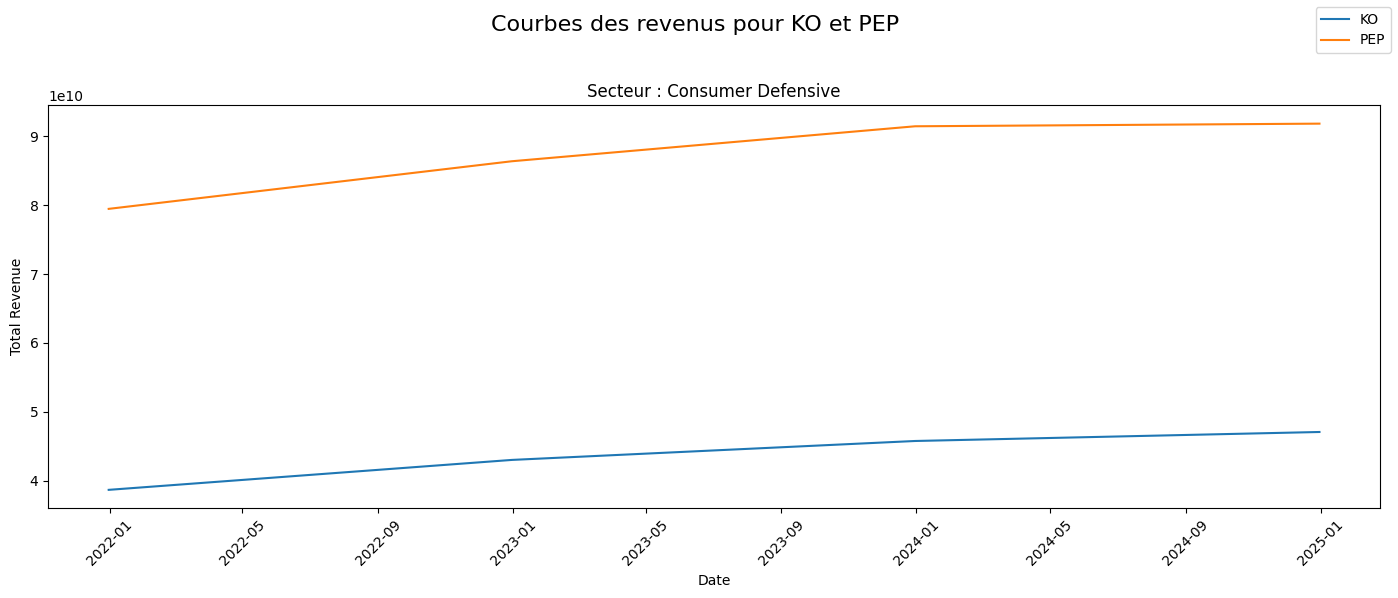

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns


#'Date' doit etre de type datetime
income_statement_consumer_defensive['Date'] = pd.to_datetime(income_statement_consumer_defensive['Date'])

# Préparation des données
tickers = income_statement_consumer_defensive['Ticker'].unique()
sectors = income_statement_consumer_defensive['sector'].unique()

# Création d'une grille de sous-graphes (1 colonne par secteur)
n_sectors = len(sectors)
fig, axes = plt.subplots(1, n_sectors, figsize=(14, 6), sharey=True)

# Si un seul secteur, `axes` n'est pas un tableau, on le force à en être un
if n_sectors == 1:
    axes = [axes]

# Tracer les courbes par secteur
for ax, sector in zip(axes, sectors):
    data_sector = income_statement_consumer_defensive[income_statement_consumer_defensive['sector'] == sector]

    for ticker in data_sector['Ticker'].unique():
        data_ticker = data_sector[data_sector['Ticker'] == ticker]
        ax.plot(data_ticker['Date'], data_ticker['Total Revenue'], label=ticker)

    ax.set_title(f"Secteur : {sector}")
    ax.set_xlabel("Date")
    ax.tick_params(axis='x', rotation=45)

axes[0].set_ylabel("Total Revenue")
fig.suptitle("Courbes des revenus pour KO et PEP", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])  # laisse de la place pour le titre

# Ajouter une légende globale
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.show()


Visuellement, nous pouvons observer que le revenu total de PEP est beaucoup plus élevé que celui de KO. Globalement, les 2 courbes se ressemblent. Elles croisent légéremment dans le temps et finissent par s'aplatir surtout pour PEP.

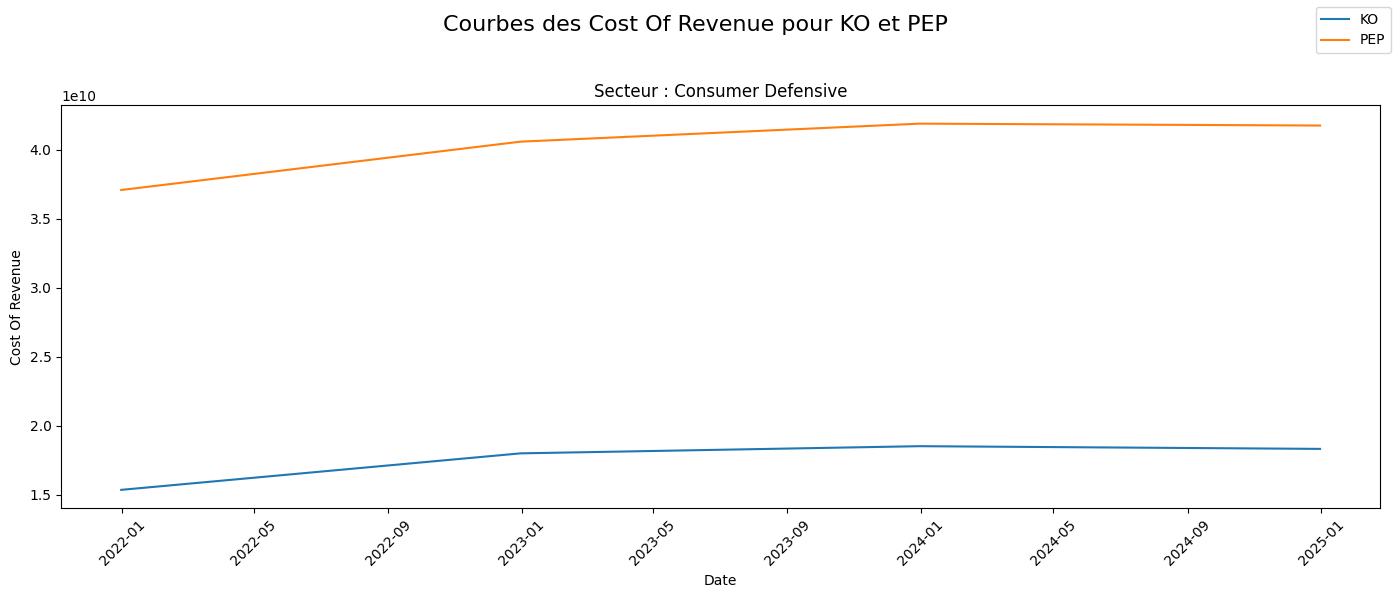

In [332]:



#'Date' doit etre de type datetime
income_statement_consumer_defensive['Date'] = pd.to_datetime(income_statement_consumer_defensive['Date'])

# Préparation des données
tickers = income_statement_consumer_defensive['Ticker'].unique()
sectors = income_statement_consumer_defensive['sector'].unique()

# Création d'une grille de sous-graphes (1 colonne par secteur)
n_sectors = len(sectors)
fig, axes = plt.subplots(1, n_sectors, figsize=(14, 6), sharey=True)

# Si un seul secteur, `axes` n'est pas un tableau, on le force à en être un
if n_sectors == 1:
    axes = [axes]

# Tracer les courbes par secteur
for ax, sector in zip(axes, sectors):
    data_sector = income_statement_consumer_defensive[income_statement_consumer_defensive['sector'] == sector]

    for ticker in data_sector['Ticker'].unique():
        data_ticker = data_sector[data_sector['Ticker'] == ticker]
        ax.plot(data_ticker['Date'], data_ticker['Cost Of Revenue'], label=ticker)

    ax.set_title(f"Secteur : {sector}")
    ax.set_xlabel("Date")
    ax.tick_params(axis='x', rotation=45)

axes[0].set_ylabel("Cost Of Revenue")
fig.suptitle("Courbes des Cost Of Revenue pour KO et PEP", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])  # laisse de la place pour le titre

# Ajouter une légende globale
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.show()


Nous pouvons observer que le couts du revenu de PEP est beaucoup plus élevé que celui de KO. Ce qui est logique à priori, vu que les revenus de PEP sont beaucoup plus élevés. Globalement, les 2 courbes se ressemblent. Elles croisent légéremment dans le temps et finissent par s'aplatir.

[*********************100%***********************]  1 of 1 completed


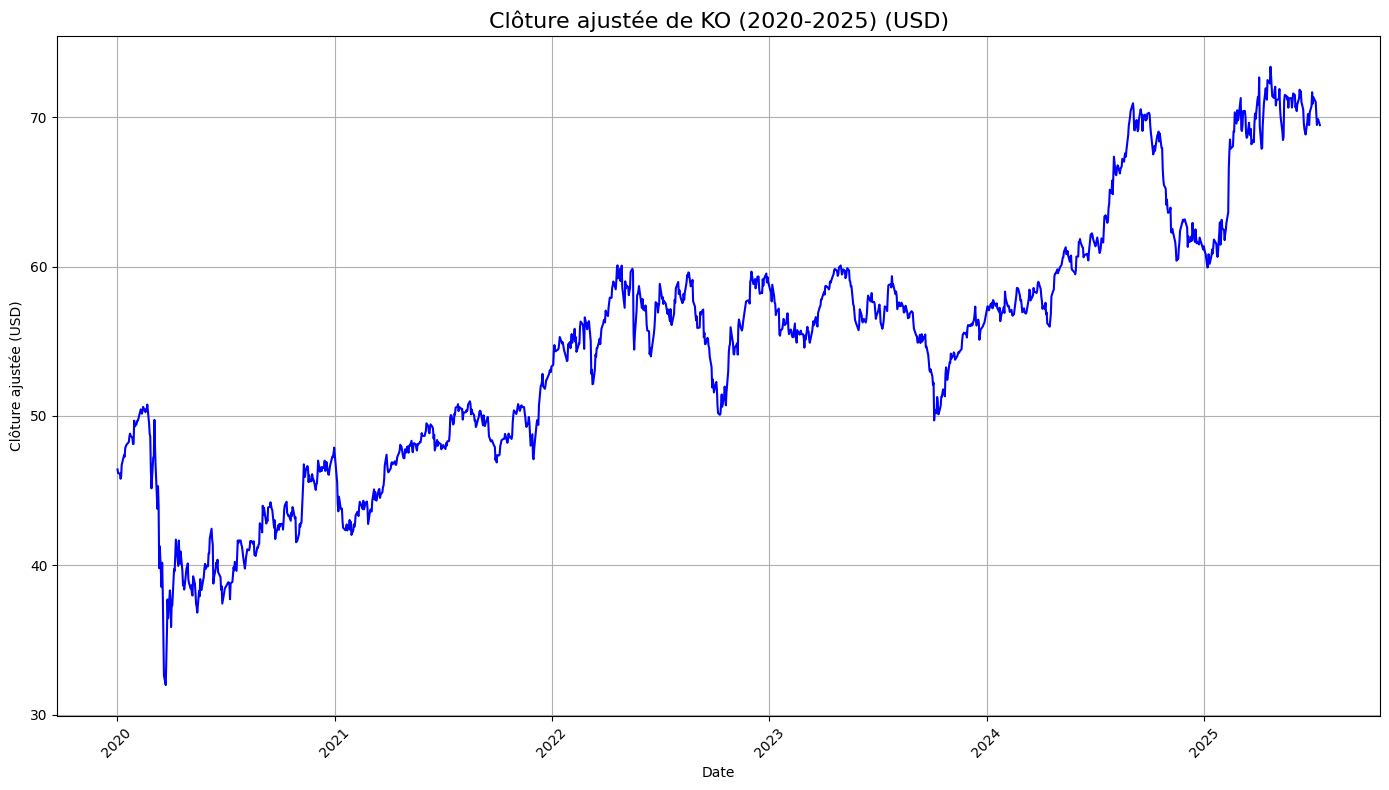

In [333]:

# Télécharger les données historiques pour KO
KO = yf.download('KO', start='2020-01-01', end='2025-07-15', auto_adjust=False)

# Simplifier le multi-index (si présent)
if KO.columns.nlevels > 1:
    KO.columns = [col[0] if col[0] != 'Price' else col[1] for col in KO.columns]

# Transformer l'index 'Date' en colonne
KO = KO.reset_index()

# Tracer la courbe avec matplotlib
plt.figure(figsize=(14, 8))
plt.plot(KO['Date'], KO['Adj Close'], label='KO', color='blue')

# Personnalisation
plt.title("Clôture ajustée de KO (2020-2025) (USD)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Clôture ajustée (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Nous pouvons observer que depuis début janvier 2020 jusqu'a présent, le cours de cloture ajusté de KO est constamment en croissance, si on met de coté les fluctuations court termes de l'action. A première vue, en se basant uniquement sur le graphique de KO et avec une logique long terme,c'est avantageux d'investir.

[*********************100%***********************]  1 of 1 completed


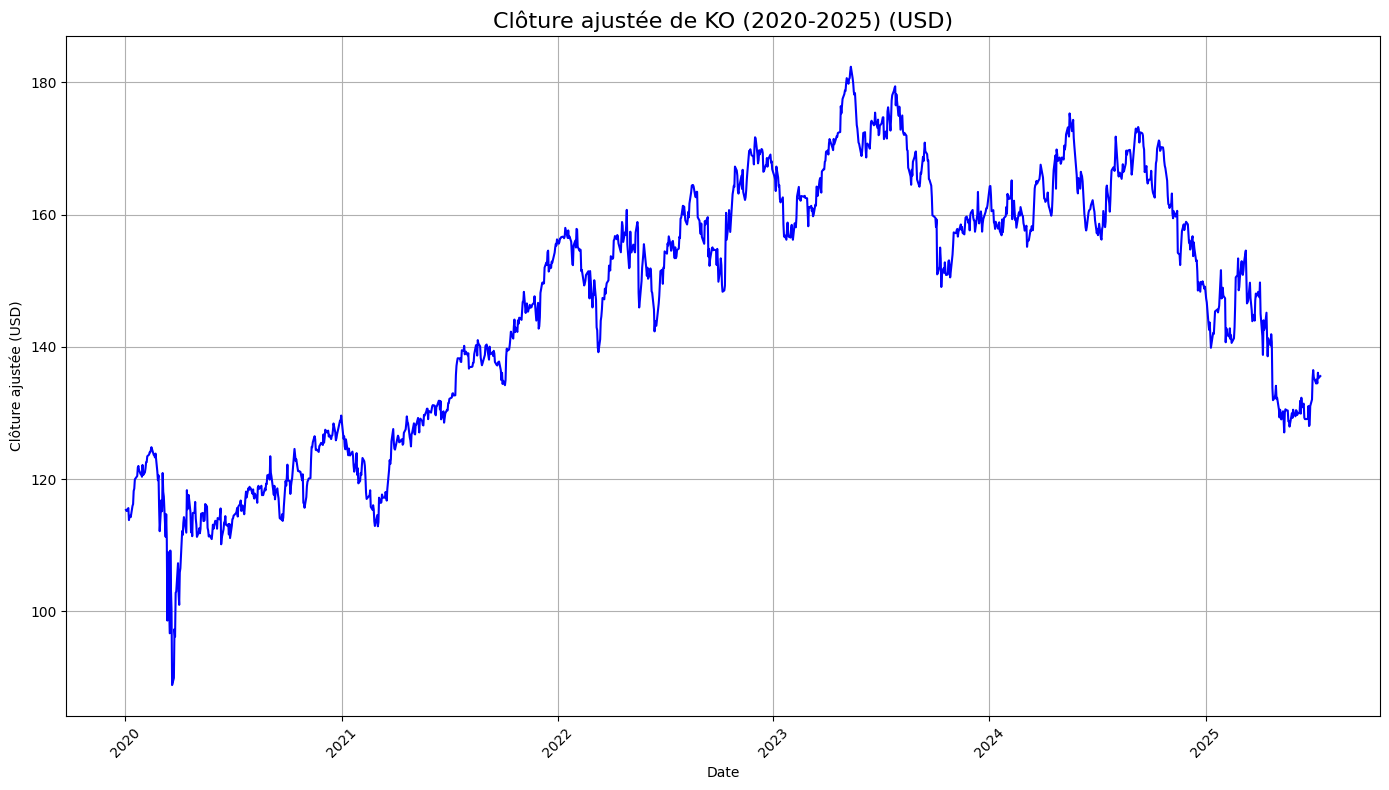

In [334]:

# Télécharger les données historiques pour PEP
KO = yf.download('PEP', start='2020-01-01', end='2025-07-15', auto_adjust=False)

# Simplifier le multi-index (si présent)
if KO.columns.nlevels > 1:
    KO.columns = [col[0] if col[0] != 'Price' else col[1] for col in KO.columns]

# Transformer l'index 'Date' en colonne
KO = KO.reset_index()

# Tracer la courbe avec matplotlib
plt.figure(figsize=(14, 8))
plt.plot(KO['Date'], KO['Adj Close'], label='KO', color='blue')

# Personnalisation
plt.title("Clôture ajustée de KO (2020-2025) (USD)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Clôture ajustée (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Nous pouvons observer que PEP a connu une phase de croissance soutenue, depuis courant 2020, jusqu'a septembre 2024, s'en suit une phase de baisse jusqu'a présent.


**Analyse du Compte de Résultats**


In [335]:
is_KO = income_statement_consumer_defensive[income_statement_consumer_defensive['Ticker'] == 'KO']

# Trie les données par Ticker et Date
is_KO = is_KO.sort_values(['Ticker', 'Date'])

is_PEP = income_statement_consumer_defensive[income_statement_consumer_defensive['Ticker'] == 'PEP']

# Trie les données par Ticker et Date
is_PEP = is_PEP.sort_values(['Ticker', 'Date'])



bs_KO = balance_sheet_consumer_defensive[balance_sheet_consumer_defensive['Ticker'] == 'KO']

# Trie les données par Ticker et Date
bs_KO = bs_KO.sort_values(['Ticker', 'Date'])

bs_PEP = balance_sheet_consumer_defensive[balance_sheet_consumer_defensive['Ticker'] == 'PEP']

# Trie les données par Ticker et Date
bs_PEP = bs_PEP.sort_values(['Ticker', 'Date'])

In [336]:

is_KO['Total Revenue (%)'] = is_KO['Total Revenue'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)
is_KO[['Ticker','Date','Total Revenue','Total Revenue (%)']]

,Ticker,Date,Total Revenue,Total Revenue (%)
3,KO,2021-12-31,3.865500e+10,NaN
2,KO,2022-12-31,4.300400e+10,11.250808
1,KO,2023-12-31,4.575400e+10,6.394754
0,KO,2024-12-31,4.706100e+10,2.856581


In [337]:

is_PEP['Total Revenue (%)'] = is_PEP['Total Revenue'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

is_PEP[['Ticker','Date','Total Revenue', 'Total Revenue (%)']]


,Ticker,Date,Total Revenue,Total Revenue (%)
3,PEP,2021-12-31,7.947400e+10,NaN
2,PEP,2022-12-31,8.639200e+10,8.704734
1,PEP,2023-12-31,9.147100e+10,5.879017
0,PEP,2024-12-31,9.185400e+10,0.418712


Nous pouvons observer que les revenus totaux de KO et PEP augmentent d'année en année mais leurs taux de croissances du revenue de KO et PEP entre 2021 et 2024 baissent, sur la meme période.

Cost Of Revenue ou Cout du Revenu

In [338]:

is_KO['Var. Cost Of Revenue (%)'] = is_KO['Cost Of Revenue'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

is_KO['cost_of_revenu / total_revenue (%)'] = is_KO['Cost Of Revenue'] / is_KO['Total Revenue'] * 100

is_KO[['Ticker','Date','Cost Of Revenue', 'Var. Cost Of Revenue (%)', 'cost_of_revenu / total_revenue (%)']]


,Ticker,Date,Cost Of Revenue,Var. Cost Of Revenue (%),cost_of_revenu / total_revenue (%)
3,KO,2021-12-31,1.535700e+10,NaN,39.728366
2,KO,2022-12-31,1.800000e+10,17.210393,41.856571
1,KO,2023-12-31,1.852000e+10,2.888889,40.477335
0,KO,2024-12-31,1.832400e+10,-1.058315,38.936699


In [339]:
is_PEP['Var. Cost Of Revenue (%)'] = is_PEP['Cost Of Revenue'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)


is_PEP['cost_of_revenu / total_revenue (%)'] = is_PEP['Cost Of Revenue'] / is_PEP['Total Revenue'] * 100

is_PEP[['Ticker','Date','Cost Of Revenue', 'Var. Cost Of Revenue (%)' ,'cost_of_revenu / total_revenue (%)']]


,Ticker,Date,Cost Of Revenue,Var. Cost Of Revenue (%),cost_of_revenu / total_revenue (%)
3,PEP,2021-12-31,3.707500e+10,NaN,46.650477
2,PEP,2022-12-31,4.057600e+10,9.443021,46.967312
1,PEP,2023-12-31,4.188100e+10,3.216187,45.786096
0,PEP,2024-12-31,4.174400e+10,-0.327117,45.446034


Pour le Cost Of Revenue, KO et PEP suivent la meme tendance à la hausse et la variation d'une année à l'autre du Cost Of Revenu baisse au fil des années. Ce qui est un point positif, pour KO et PEP. En effet plus les couts de ventes diminus, plus la marge brute augmentera. En faisant le rapport couts de ventes sur chiffre d'affaire, on peut observer que ce rapport est plus faible pour KO que PEP. C'est un avantage important pour KO, car le coût du revenu représente une part moins importante du chiffre d'affaire et que par conséquent il restera plus de liquidité pour KO après avoir financé le coût des ventes.

**Gross Profit ou Marge Brut**

In [340]:

is_KO['Var. Gross Profit (%)'] = is_KO['Gross Profit'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

is_KO['gross_profit / total_revenue (%)'] = is_KO['Gross Profit'] / is_KO['Total Revenue'] * 100

is_KO[['Ticker','Date','Gross Profit', 'Var. Gross Profit (%)', 'gross_profit / total_revenue (%)']]


,Ticker,Date,Gross Profit,Var. Gross Profit (%),gross_profit / total_revenue (%)
3,KO,2021-12-31,2.329800e+10,NaN,60.271634
2,KO,2022-12-31,2.500400e+10,7.322517,58.143429
1,KO,2023-12-31,2.723400e+10,8.918573,59.522665
0,KO,2024-12-31,2.873700e+10,5.518837,61.063301


In [341]:
is_PEP['Var. Gross Profit (%)'] = is_PEP['Gross Profit'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

is_PEP['gross_profit / total_revenue (%)'] = is_PEP['Gross Profit'] / is_PEP['Total Revenue'] * 100
is_PEP[['Ticker','Date','Gross Profit', 'Var. Gross Profit (%)', 'gross_profit / total_revenue (%)']]


,Ticker,Date,Gross Profit,Var. Gross Profit (%),gross_profit / total_revenue (%)
3,PEP,2021-12-31,4.239900e+10,NaN,53.349523
2,PEP,2022-12-31,4.581600e+10,8.059152,53.032688
1,PEP,2023-12-31,4.959000e+10,8.237297,54.213904
0,PEP,2024-12-31,5.011000e+10,1.048599,54.553966


Nous pouvons observer que le gross profit ou bénéfice brut suit la meme tendance que le revenu total pour les 2 entreprises. Il augmente au fil du temps. Ce qui n'est pas étonnant vu que les revenus totaux augmentent et qu'ils sont supérieurs aux coûts des ventes. De plus, la marge brute sur le revenu total est plus avantageux pour KO, ce qui était prévisible vu que son cout du revenu représente une part moins importante de son revenu total. Et qui donc désavantage PEP qui lui à une part plus importante du cout des ventes sur son revenu.

**Operating Expense - Dépenses opérationnelles**

In [342]:

is_KO['Var. Operating Expense (%)'] = is_KO['Operating Expense'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

is_KO['operating_expense / total_revenue (%)'] = is_KO['Operating Expense'] / is_KO['Total Revenue'] * 100


is_KO[['Ticker','Date','Operating Expense', 'Var. Operating Expense (%)', 'operating_expense / total_revenue (%)']]

,Ticker,Date,Operating Expense,Var. Operating Expense (%),operating_expense / total_revenue (%)
3,KO,2021-12-31,1.225900e+10,NaN,31.713879
2,KO,2022-12-31,1.296200e+10,5.734562,30.141382
1,KO,2023-12-31,1.413600e+10,9.057244,30.895659
0,KO,2024-12-31,1.471500e+10,4.095925,31.267929


In [343]:

is_PEP['Var. Operating Expense (%)'] = is_PEP['Operating Expense'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

is_PEP['operating_expense / total_revenue (%)'] = is_PEP['Operating Expense'] / is_PEP['Total Revenue'] * 100


is_PEP[['Ticker','Date','Operating Expense', 'Var. Operating Expense (%)', 'operating_expense / total_revenue (%)']]


,Ticker,Date,Operating Expense,Var. Operating Expense (%),operating_expense / total_revenue (%)
3,PEP,2021-12-31,3.123700e+10,NaN,39.304678
2,PEP,2022-12-31,3.445900e+10,10.314691,39.886795
1,PEP,2023-12-31,3.667700e+10,6.436635,40.096861
0,PEP,2024-12-31,3.719000e+10,1.398697,40.488166


Les dépenses opérationnelles augmentent au fil des années pour KO ainsi que pour PEP. Mais les variations des dépenses d'une année à l'autre diminue. Ce qui est un signe positif pour les deux entreprises. En faisant le rapport entre l'operating expense et le chiffre d'affaire, KO obtient un ratio plus faible que PEP, ce qui est plus avantageux pour KO, car ses dépenses opérationnelles représentent une part moins importante de son chiffre d'affaire. PEP doit donc supporter une dépense plus importante.

**Operating Income**

In [344]:

is_KO['Var. Operating Income (%)'] =is_KO['Operating Income'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

is_KO['operating_income / total_revenue (%)'] = is_KO['Operating Income'] / is_KO['Total Revenue'] * 100


is_KO[['Ticker','Date','Operating Income', 'Var. Operating Income (%)', 'operating_income / total_revenue (%)']]


,Ticker,Date,Operating Income,Var. Operating Income (%),operating_income / total_revenue (%)
3,KO,2021-12-31,1.103900e+10,NaN,28.557754
2,KO,2022-12-31,1.204200e+10,9.085968,28.002046
1,KO,2023-12-31,1.309800e+10,8.769307,28.627005
0,KO,2024-12-31,1.402200e+10,7.054512,29.795372


In [345]:

is_PEP['Var. Operating Income (%)'] = is_PEP['Operating Income'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

is_PEP['operating_income / total_revenue (%)'] = is_PEP['Operating Income'] / is_PEP['Total Revenue'] * 100


is_PEP[['Ticker','Date','Operating Income', 'Var. Operating Income (%)', 'operating_income / total_revenue (%)']]

,Ticker,Date,Operating Income,Var. Operating Income (%),operating_income / total_revenue (%)
3,PEP,2021-12-31,1.116200e+10,NaN,14.044845
2,PEP,2022-12-31,1.135700e+10,1.746999,13.145893
1,PEP,2023-12-31,1.291300e+10,13.700801,14.117043
0,PEP,2024-12-31,1.292000e+10,0.054209,14.065800


Les revenus opérationnels augmentent au fil des années pour KO ainsi que pour PEP. Mais les variations des revenus d'une année à l'autre diminue (globalement), ce qui n'est pas un bon signe à priori. On peut observer que les variations d'operating income pour KO baisse moins drastiquement que pour PEP. A titre d'exemple, pour PEP son revenu opérationnel augmente de +13% de fin 2022 à 2023, puis n'augmente que de 0.05% entre fin 2023 et 2024. A cette meme période KO à pour variations +8.7% et +7.05%.  En faisant le rapport entre l'operating expense et le chiffre d'affaire, KO obtient un ratio plus élevé que PEP, ce qui est plus avantageux pour KO, car une part plus importante de son chiffre d'affaire est compris dans son revenu opérationnel.

**EBIT**

In [346]:

is_KO['Var. EBIT (%)'] = is_KO['EBIT'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

is_KO['EBIT / total_revenue (%)'] = is_KO['EBIT'] / is_KO['Total Revenue'] * 100


is_KO[['Ticker','Date','EBIT', 'Var. EBIT (%)', 'EBIT / total_revenue (%)']]



,Ticker,Date,EBIT,Var. EBIT (%),EBIT / total_revenue (%)
3,KO,2021-12-31,1.402200e+10,NaN,36.274738
2,KO,2022-12-31,1.256800e+10,-10.369419,29.225188
1,KO,2023-12-31,1.447900e+10,15.205283,31.645321
0,KO,2024-12-31,1.474200e+10,1.816424,31.325301


In [347]:

is_PEP['Var. EBIT (%)'] = is_PEP['EBIT'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

is_PEP['EBIT / total_revenue (%)'] = is_PEP['EBIT'] / is_PEP['Total Revenue'] * 100


is_PEP[['Ticker','Date','EBIT', 'Var. EBIT (%)' ,'EBIT / total_revenue (%)']]


,Ticker,Date,EBIT,Var. EBIT (%),EBIT / total_revenue (%)
3,PEP,2021-12-31,1.168400e+10,NaN,14.701663
2,PEP,2022-12-31,1.164400e+10,-0.342349,13.478100
1,PEP,2023-12-31,1.223600e+10,5.084164,13.376917
0,PEP,2024-12-31,1.286500e+10,5.140569,14.005922


Le constat est le meme que pour le revenue opérationnel, l'EBIT augmente au fil des ans. Le rapport EBIT / Chiffre d'affaire est plus élevé pour KO, avec prés du double que pour PEP. Ce qui avantage une fois de plus KO.

In [348]:

is_KO['Var. EBITDA (%)'] = is_KO['EBITDA'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

is_KO['EBITDA / total_revenue (%)'] = is_KO['EBITDA'] / is_KO['Total Revenue'] * 100
is_KO['EBITDA / operating_income (%)'] = is_KO['EBITDA'] / is_KO['Operating Income'] * 100

is_KO[['Ticker','Date','EBITDA', 'Var. EBITDA (%)', 'EBITDA / total_revenue (%)', 'EBITDA / operating_income (%)']]


,Ticker,Date,EBITDA,Var. EBITDA (%),EBITDA / total_revenue (%),EBITDA / operating_income (%)
3,KO,2021-12-31,1.547400e+10,NaN,40.031044,140.175741
2,KO,2022-12-31,1.382800e+10,-10.637198,32.155148,114.831423
1,KO,2023-12-31,1.560700e+10,12.865201,34.110679,119.155596
0,KO,2024-12-31,1.581700e+10,1.345550,33.609571,112.801312


In [349]:

is_PEP['Var. EBITDA (%)'] = is_PEP['EBITDA'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

is_PEP['EBITDA / total_revenue (%)'] = is_PEP['EBITDA'] / is_PEP['Total Revenue'] * 100
is_PEP['EBITDA / operating_income (%)'] = is_PEP['EBITDA'] / is_PEP['Operating Income'] * 100

is_PEP[['Ticker','Date','EBITDA', 'Var. EBITDA (%)', 'EBITDA / total_revenue (%)', 'EBITDA / operating_income (%)']]


,Ticker,Date,EBITDA,Var. EBITDA (%),EBITDA / total_revenue (%),EBITDA / operating_income (%)
3,PEP,2021-12-31,1.489900e+10,NaN,18.747012,133.479663
2,PEP,2022-12-31,1.492400e+10,0.167796,17.274748,131.407942
1,PEP,2023-12-31,1.575400e+10,5.561512,17.222945,122.001084
0,PEP,2024-12-31,1.668000e+10,5.877872,18.159253,129.102167


In [350]:
is_KO['Net Income / total_revenue (%)'] = is_KO['Net Income'] / is_KO['Total Revenue'] * 100

is_KO['Var. Net Income (%)'] = is_KO['Net Income'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)
is_KO[['Ticker','Date','Net Income', 'Var. Net Income (%)', 'Net Income / total_revenue (%)']]


,Ticker,Date,Net Income,Var. Net Income (%),Net Income / total_revenue (%)
3,KO,2021-12-31,9.771000e+09,NaN,25.277454
2,KO,2022-12-31,9.542000e+09,-2.343670,22.188634
1,KO,2023-12-31,1.071400e+10,12.282540,23.416532
0,KO,2024-12-31,1.063100e+10,-0.774687,22.589830


In [351]:
is_PEP['Net Income / total_revenue (%)'] = is_PEP['Net Income'] / is_PEP['Total Revenue'] * 100

is_PEP['Var. Net Income (%)'] = is_PEP['Net Income'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)
is_PEP[['Ticker','Date','Net Income', 'Var. Net Income (%)', 'Net Income / total_revenue (%)']]


,Ticker,Date,Net Income,Var. Net Income (%),Net Income / total_revenue (%)
3,PEP,2021-12-31,7.618000e+09,NaN,9.585525
2,PEP,2022-12-31,8.910000e+09,16.959832,10.313455
1,PEP,2023-12-31,9.074000e+09,1.840629,9.920084
0,PEP,2024-12-31,9.578000e+09,5.554331,10.427417


In [352]:
is_KO['Net Income Common Stockholders / total_revenue (%)'] = is_KO['Net Income Common Stockholders'] / is_KO['Total Revenue'] * 100

is_KO['Var. Net Income Common Stockholders (%)'] = is_KO['Net Income Common Stockholders'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)


is_KO[['Ticker','Date','Net Income Common Stockholders', 'Var. Net Income Common Stockholders (%)', 'Net Income Common Stockholders / total_revenue (%)']]


,Ticker,Date,Net Income Common Stockholders,Var. Net Income Common Stockholders (%),Net Income Common Stockholders / total_revenue (%)
3,KO,2021-12-31,9.771000e+09,NaN,25.277454
2,KO,2022-12-31,9.542000e+09,-2.343670,22.188634
1,KO,2023-12-31,1.071400e+10,12.282540,23.416532
0,KO,2024-12-31,1.063100e+10,-0.774687,22.589830


In [353]:
is_PEP['Net Income Common Stockholders / total_revenue (%)'] = is_PEP['Net Income Common Stockholders'] / is_PEP['Total Revenue'] * 100


is_PEP['Var. Net Income Common Stockholders (%)'] = is_PEP['Net Income Common Stockholders'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)


is_PEP[['Ticker','Date','Net Income Common Stockholders', 'Var. Net Income Common Stockholders (%)', 'Net Income Common Stockholders / total_revenue (%)']]


,Ticker,Date,Net Income Common Stockholders,Var. Net Income Common Stockholders (%),Net Income Common Stockholders / total_revenue (%)
3,PEP,2021-12-31,7.618000e+09,NaN,9.585525
2,PEP,2022-12-31,8.910000e+09,16.959832,10.313455
1,PEP,2023-12-31,9.074000e+09,1.840629,9.920084
0,PEP,2024-12-31,9.578000e+09,5.554331,10.427417


L'actionnaire surveille attentivement la variation du Net Income Common Stockholders (bénéfice net attribuable aux actionnaires ordinaires), car il représente le montant du bénéfice net qui peut potentiellement être distribué sous forme de dividendes ou réinvesti dans l’entreprise au bénéfice des actionnaires.

Une hausse régulière de ce résultat est perçue positivement : elle reflète une entreprise rentable, performante et susceptible de générer plus de valeur à long terme.


Bien entendu, cette augmentation de bénéfice doit etre régulière et non causée par des éléments exceptionnels et non récurrents d'une année à l'autre.

In [354]:
is_KO['Normalized_Income / total_revenue (%)'] = is_KO['Normalized Income'] / is_KO['Total Revenue'] * 100

is_KO['Var. Normalized Income (%)'] = is_KO['Normalized Income'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

is_KO[['Ticker','Date','Normalized Income', 'Var. Normalized Income (%)', 'Normalized_Income / total_revenue (%)']]



,Ticker,Date,Normalized Income,Var. Normalized Income (%),Normalized_Income / total_revenue (%)
3,KO,2021-12-31,8.892843e+09,NaN,23.005673
2,KO,2022-12-31,1.046993e+10,17.734306,24.346403
1,KO,2023-12-31,1.161434e+10,10.930477,25.384316
0,KO,2024-12-31,1.224760e+10,5.452432,26.024955


In [355]:
is_PEP['Normalized_Income / total_revenue (%)'] = is_PEP['Normalized Income'] / is_PEP['Total Revenue'] * 100

is_PEP['Var. Normalized Income (%)'] = is_PEP['Normalized Income'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

is_PEP[['Ticker','Date','Normalized Income', 'Var. Normalized Income (%)', 'Normalized_Income / total_revenue (%)']]



,Ticker,Date,Normalized Income,Var. Normalized Income (%),Normalized_Income / total_revenue (%)
3,PEP,2021-12-31,7.618000e+09,NaN,9.585525
2,PEP,2022-12-31,8.779955e+09,15.252757,10.162926
1,PEP,2023-12-31,9.817454e+09,11.816678,10.732860
0,PEP,2024-12-31,9.604598e+09,-2.168139,10.456374


En retranchant tous les éléments exceptionnels du Net Income, comme des gains ou pertes exceptionnels ou bien des charges non récurrentes, on obtient le Normalized Income. Le Normalized Income refléte donc plus fidélement le résultat de l'entreprise en supprimant des éléments qui faussent la performance réelle de l'entreprise. Ainsi par exemple pour KO en fin 2022 la variation de revenu net passe de -2.34% à +17.73%, et pour PEP en fin 2023, cela passe de +1.84% à +11.81% donc on a retranché les dépenses, charges non récurrentes à cette meme période et cela a fait augmenter le revenu net normalisé. Le contraire est aussi observé, des revenus exceptionnels qui ont été retranchés et ont fait baisser le revenu net normalisé.

In [356]:
is_KO['Basic_EPS / net_income (%)'] = is_KO['Basic EPS'] / is_KO['Net Income'] * 100


is_KO['Var. Basic EPS (%)'] = is_KO['Basic EPS'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)


is_KO[['Ticker','Date','Basic EPS', 'Var. Basic EPS (%)','Basic_EPS / net_income (%)']]




,Ticker,Date,Basic EPS,Var. Basic EPS (%),Basic_EPS / net_income (%)
3,KO,2021-12-31,2.26,NaN,2.312967e-08
2,KO,2022-12-31,2.20,-2.654867,2.305596e-08
1,KO,2023-12-31,2.48,12.727273,2.314728e-08
0,KO,2024-12-31,2.47,-0.403226,2.323394e-08


In [357]:
is_PEP['Basic_EPS / net_income (%)'] = is_PEP['Basic EPS'] / is_PEP['Net Income'] * 100



is_PEP['Var. Basic EPS (%)'] = is_PEP['Basic EPS'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

is_PEP[['Ticker','Date','Basic EPS','Var. Basic EPS (%)', 'Basic_EPS / net_income (%)']]



,Ticker,Date,Basic EPS,Var. Basic EPS (%),Basic_EPS / net_income (%)
3,PEP,2021-12-31,5.508315,NaN,7.230658e-08
2,PEP,2022-12-31,6.470588,17.469462,7.262164e-08
1,PEP,2023-12-31,6.604076,2.062996,7.278021e-08
0,PEP,2024-12-31,6.981105,5.709035,7.288688e-08


Pour PEP, son basic EPS augmente d'année en année passant de 5.5 en 2021 à 6.98 en 2024. Pour KO son basic EPS est plus erratique. Parfois il diminue et parfois il remonte. Si un rachat de ses propres actions a été effectuée, par l'entreprise, cela à pour conséquence d'augmenter le basic EPS, vu que le nombre d'actions en circulation est à son dénominateur. Et c'est ce que nous pouvons observer, car le Ordinary Shares Number diminue d'année en année pour les 2 entreprises.C'est un signal positive vers les marchés financiers à priori, cela démontre que l'entreprise a confiance en elle même et ses performances futures. En faisant l'hypothèse que les 2 entreprises n'ont pas de Dividendes sur Actions Privilégiées et que le net income de KO étant supérieur à celui de PEP (comme vu précédemment) , à nombre d'actions en circulation égal, KO derait avoir un basic EPS plus élevé, ce qui n'est pas le cas. Cela est du au nombre d'actions en circulation de KO qui est nettement supérieur à celui de PEP.

In [358]:
bs_KO['Var. Ordinary Shares Number (%)'] = bs_KO['Ordinary Shares Number'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

bs_KO[['Ticker', 'Date', 'Ordinary Shares Number', 'Var. Ordinary Shares Number (%)']]


,Ticker,Date,Ordinary Shares Number,Var. Ordinary Shares Number (%)
4,KO,2020-12-31,NaN,NaN
3,KO,2021-12-31,4.325129e+09,NaN
2,KO,2022-12-31,4.328000e+09,0.066381
1,KO,2023-12-31,4.308000e+09,-0.462107
0,KO,2024-12-31,4.302000e+09,-0.139276


In [359]:
bs_PEP['Var. Ordinary Shares Number (%)'] = bs_PEP['Ordinary Shares Number'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)

bs_PEP[['Ticker', 'Date', 'Ordinary Shares Number', 'Var. Ordinary Shares Number (%)']]


,Ticker,Date,Ordinary Shares Number,Var. Ordinary Shares Number (%)
4,PEP,2020-12-31,NaN,NaN
3,PEP,2021-12-31,1.383000e+09,NaN
2,PEP,2022-12-31,1.377000e+09,-0.433839
1,PEP,2023-12-31,1.374000e+09,-0.217865
0,PEP,2024-12-31,1.371989e+09,-0.146359


***Au niveau du Bilan***


**Calcul du BFR pour KO**

**Stocks**

In [360]:
bs_KO['Inventory (%)'] = bs_KO['Inventory'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)
bs_KO[['Ticker','Date','Inventory']]


,Ticker,Date,Inventory
4,KO,2020-12-31,NaN
3,KO,2021-12-31,3.414000e+09
2,KO,2022-12-31,4.233000e+09
1,KO,2023-12-31,4.424000e+09
0,KO,2024-12-31,4.728000e+09


**Créances Clients**

In [361]:
bs_KO[['Ticker','Date','Receivables']]

,Ticker,Date,Receivables
4,KO,2020-12-31,NaN
3,KO,2021-12-31,3.512000e+09
2,KO,2022-12-31,3.487000e+09
1,KO,2023-12-31,3.410000e+09
0,KO,2024-12-31,3.569000e+09


**Dettes Fournisseurs**

In [362]:
bs_KO[['Ticker','Date','Accounts Payable']]

,Ticker,Date,Accounts Payable
4,KO,2020-12-31,NaN
3,KO,2021-12-31,4.602000e+09
2,KO,2022-12-31,5.307000e+09
1,KO,2023-12-31,5.590000e+09
0,KO,2024-12-31,5.468000e+09


**BFR**

In [363]:
# Calculer le BFR
bs_KO['BFR'] = bs_KO['Inventory'] + bs_KO['Receivables'] - bs_KO['Accounts Payable']

bs_KO[['Ticker','Date','BFR']]

,Ticker,Date,BFR
4,KO,2020-12-31,NaN
3,KO,2021-12-31,2.324000e+09
2,KO,2022-12-31,2.413000e+09
1,KO,2023-12-31,2.244000e+09
0,KO,2024-12-31,2.829000e+09


**Calcul du BFR pour PEP**

**Stocks**

In [364]:
bs_PEP['Inventory (%)'] = bs_PEP['Inventory'].transform(
    lambda x: (x - x.shift(1)) / abs(x.shift(1)) * 100
)
bs_PEP[['Ticker','Date','Inventory']]


,Ticker,Date,Inventory
4,PEP,2020-12-31,NaN
3,PEP,2021-12-31,4.347000e+09
2,PEP,2022-12-31,5.222000e+09
1,PEP,2023-12-31,5.334000e+09
0,PEP,2024-12-31,5.306000e+09


**Créances Clients**

In [365]:
bs_PEP[['Ticker','Date','Receivables']]


,Ticker,Date,Receivables
4,PEP,2020-12-31,NaN
3,PEP,2021-12-31,8.680000e+09
2,PEP,2022-12-31,1.016300e+10
1,PEP,2023-12-31,1.081500e+10
0,PEP,2024-12-31,1.033300e+10


**Dettes Fournisseurs**

In [366]:
bs_PEP[['Ticker','Date','Accounts Payable']]


,Ticker,Date,Accounts Payable
4,PEP,2020-12-31,NaN
3,PEP,2021-12-31,9.834000e+09
2,PEP,2022-12-31,1.073200e+10
1,PEP,2023-12-31,1.163500e+10
0,PEP,2024-12-31,1.099700e+10


**BFR**

In [367]:
# Calculer le BFR
bs_PEP['BFR'] = bs_PEP['Inventory'] + bs_PEP['Receivables'] - bs_PEP['Accounts Payable']

bs_PEP[['Ticker','Date','BFR']]

,Ticker,Date,BFR
4,PEP,2020-12-31,NaN
3,PEP,2021-12-31,3.193000e+09
2,PEP,2022-12-31,4.653000e+09
1,PEP,2023-12-31,4.514000e+09
0,PEP,2024-12-31,4.642000e+09


Nous pouvons observer que pour KO et PEP les BFR sont positifs. Les BFR de KO sont inférieurs que ceux de PEP. C'est un point positif pour KO, car elle a besoin de moins de liquidité pour le bon déroulement de son activité que PEP. Cette augmentation du BFR année après année est du à un délai de paiement des clients "trop long" ou bien d'un délai de paiement des fournisseurs "trop court" ou bien d'un stock qui s'accroit.

Allons plus en profondeur et tentons de déterminer le DRC (Délai recouvrement clients) et le DPF (Délai paiement fournisseurs)

**DRC et DPF pour KO**

In [368]:
bs_KO['DRC'] = (bs_KO['Receivables'] / is_KO['Total Revenue']) * 365
bs_KO['DPF'] = (bs_KO['Accounts Payable'] / is_KO['Cost Of Revenue']) * 365

bs_KO[['Ticker','Date','DRC','DPF']]

,Ticker,Date,DRC,DPF
4,KO,2020-12-31,NaN,NaN
3,KO,2021-12-31,33.162075,109.378785
2,KO,2022-12-31,29.596200,107.614167
1,KO,2023-12-31,27.203086,110.170086
0,KO,2024-12-31,27.680776,108.918358


**DRC et DPF pour PEP**

In [369]:
bs_PEP['DRC'] = (bs_PEP['Receivables'] / is_PEP['Total Revenue']) * 365
bs_PEP['DPF'] = (bs_PEP['Accounts Payable'] / is_PEP['Cost Of Revenue']) * 365

bs_PEP[['Ticker','Date','DRC','DPF']]

,Ticker,Date,DRC,DPF
4,PEP,2020-12-31,NaN,NaN
3,PEP,2021-12-31,39.864610,96.814835
2,PEP,2022-12-31,42.937946,96.539334
1,PEP,2023-12-31,43.155481,101.400993
0,PEP,2024-12-31,41.060215,96.155256


Pour KO, le délai de recouvrement client diminue d'année en année atteignant en moyenne 29 jours. Cette diminution est une chose positive pour KO qui fait diminuer le BFR. Le délai de paiement des fournisseurs suit un cycle de faibles baisses puis faibles remontées, avec en moyenne 108 jours. Pour PEP, le délai de recouvrement client augmente d'année en année avec pour moyenne 41 jours, sauf pour l'année 2023.Et le délai paiement des fournisseurs est autour des 96 jours. De plus on peut remarquer, qu'en faisant la différence entre délai paiement founisseur et délai recouvrement, KO obtient un résultat plus élevé. C'est un signal qui avantage KO, car plus une entreprise paye "tard" ses fournisseurs et plus l'argent qui revient aux fournisseurs restera dans l'entreprise. C'est donc de la liquidité en plus dans les comptes de l'entreprise, le temps que le paiement s'effectue. Augmenter le délai de recouvrement client n'est pas forcément un signal négatif, cela peut être du à une politique de l'entreprise de donner plus de temps aux clients de payer pour augmenter les ventes. Quoi qu'il en soit, il faut que PEP finance ce besoin en fond de roulement grandissant.

**Au niveau des Ratios Financiers**

**ROE**

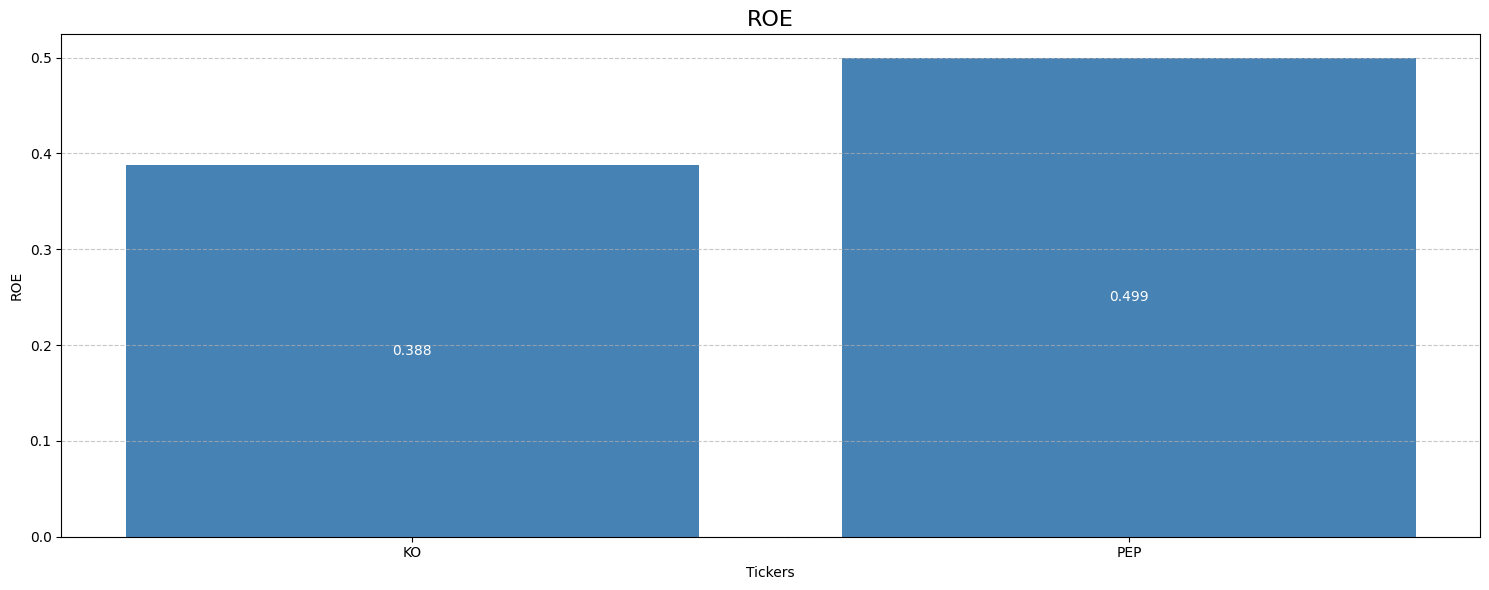

In [370]:

# Extraire les données uniques
symbols = ratios_consumer_defensive['symbol'].unique()
ROE = ratios_consumer_defensive.drop_duplicates(subset='symbol')['returnOnEquity'].values

# Créer le graphique en barres
plt.figure(figsize=(15, 6))
bars = plt.bar(symbols, ROE, color='steelblue')

# Ajouter les valeurs dans les barres
for bar, value in zip(bars, ROE):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{value:.3f}', ha='center', va='center', color='white', fontsize=10)

# Personnaliser le graphique
plt.title("ROE", fontsize=16)
plt.xlabel("Tickers")
plt.ylabel("ROE")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Le capital investi par les actionnaires est utilisé plus efficacement par PEP que KO, vu que le ROE de PEP est supérieur à celui de KO. Chaque $ investi dans PEP par les actionnaires rapport plus que pour KO. De ce fait, les actionnaires auront tendance à investir plus massivement vers une entreprise avec un ROE plus élevé. Ce ratio valorise plus PEP que KO à priori. Cependant un ROE élevé peut parfois être le résultat d'un endettement important (levier financier). Si l'entreprise utilise beaucoup de dette pour financer ses opérations, cela peut augmenter le ROE, mais aussi augmenter le risque financier. De ce fait, nous allons utiliser la décomposition de DuPont pour mieux comprendre la composition des ROE de PEP et KO.


La formule de DuPont décompose le ROE en trois facteurs principaux :

ROE = Marge Nette * Rotation des Actifs * Levier Financier

---


Calculons ces 3 facteurs


In [371]:

is_KO['Marge Nette'] = is_KO['Net Income'] / is_KO['Total Revenue']

is_KO['Rotation Actifs'] = is_KO['Total Revenue'] / bs_KO['Total Assets']

is_KO['Levier Financier'] = bs_KO['Total Assets'] / bs_KO['Stockholders Equity']

is_KO[['Ticker', 'Date', 'Marge Nette', 'Rotation Actifs', 'Levier Financier']]

,Ticker,Date,Marge Nette,Rotation Actifs,Levier Financier
3,KO,2021-12-31,0.252775,0.409681,4.102526
2,KO,2022-12-31,0.221886,0.463590,3.848289
1,KO,2023-12-31,0.234165,0.468297,3.766354
0,KO,2024-12-31,0.225898,0.468040,4.045261


In [372]:

is_PEP['Marge Nette'] = is_PEP['Net Income'] / is_PEP['Total Revenue']

is_PEP['Rotation Actifs'] = is_PEP['Total Revenue'] / bs_PEP['Total Assets']

is_PEP['Levier Financier'] = bs_PEP['Total Assets'] / bs_PEP['Stockholders Equity']

is_PEP[['Ticker', 'Date', 'Marge Nette', 'Rotation Actifs', 'Levier Financier']]

,Ticker,Date,Marge Nette,Rotation Actifs,Levier Financier
3,PEP,2021-12-31,0.095855,0.860322,5.758088
2,PEP,2022-12-31,0.103135,0.937139,5.375649
1,PEP,2023-12-31,0.099201,0.910204,5.431281
0,PEP,2024-12-31,0.104274,0.923462,5.513386


Après analyse du ROE par la décomposition de DuPont, on se rend compte que la marge nette dégagée par KO est supérieur à celle de PEP et l'effet de levier utilisé par PEP est supérieur à celui de KO et ceux durant toutes les années prises en compte pour l'analyse. Ce qui signifie que le ROE de PEP est "gonflé" artificiellement par effet de levier, par de la dette, ce qui est risqué. Pour KO, son ROE est davantage tiré par sa rentabilité opérationnelle. En conclusion, ce ratio valorise plus KO que PEP.

In [373]:
bs_KO['Levier Financier'] = bs_KO['Total Assets'] / bs_KO['Stockholders Equity']

bs_KO[['Ticker','Date','Levier Financier']]

,Ticker,Date,Levier Financier
4,KO,2020-12-31,NaN
3,KO,2021-12-31,4.102526
2,KO,2022-12-31,3.848289
1,KO,2023-12-31,3.766354
0,KO,2024-12-31,4.045261


In [374]:
bs_PEP['Levier Financier'] = bs_PEP['Total Assets'] / bs_PEP['Stockholders Equity']
bs_PEP[['Ticker','Date','Levier Financier']]

,Ticker,Date,Levier Financier
4,PEP,2020-12-31,NaN
3,PEP,2021-12-31,5.758088
2,PEP,2022-12-31,5.375649
1,PEP,2023-12-31,5.431281
0,PEP,2024-12-31,5.513386


Le ratio Total Assets / Stockholders Equity devant etre le plus proche de 1, en effet si ce ratio = 3 par exemple, cela signifie que l'ensemble des actifs de l'entreprise vaut 3 fois les capitaux propres. Ce qui implique le financement du total des actifs de 33% provenant des capitaux propres et 66% par la dette. Donc plus ce ratio augmente et plus l'entreprise utilise un effet de levier par la dette. Ce qui pourrait devenir risqué en cas de difficulté de l'entreprise ou bien si la dette augmente de trop et devient difficilement gérable/remboursable.

Nous pouvons observer que pour ce ratio, KO est avantagée par rapport à PEP, car l'effet de levier utilisé est plus faible que pour celui de PEP.

**ROA**

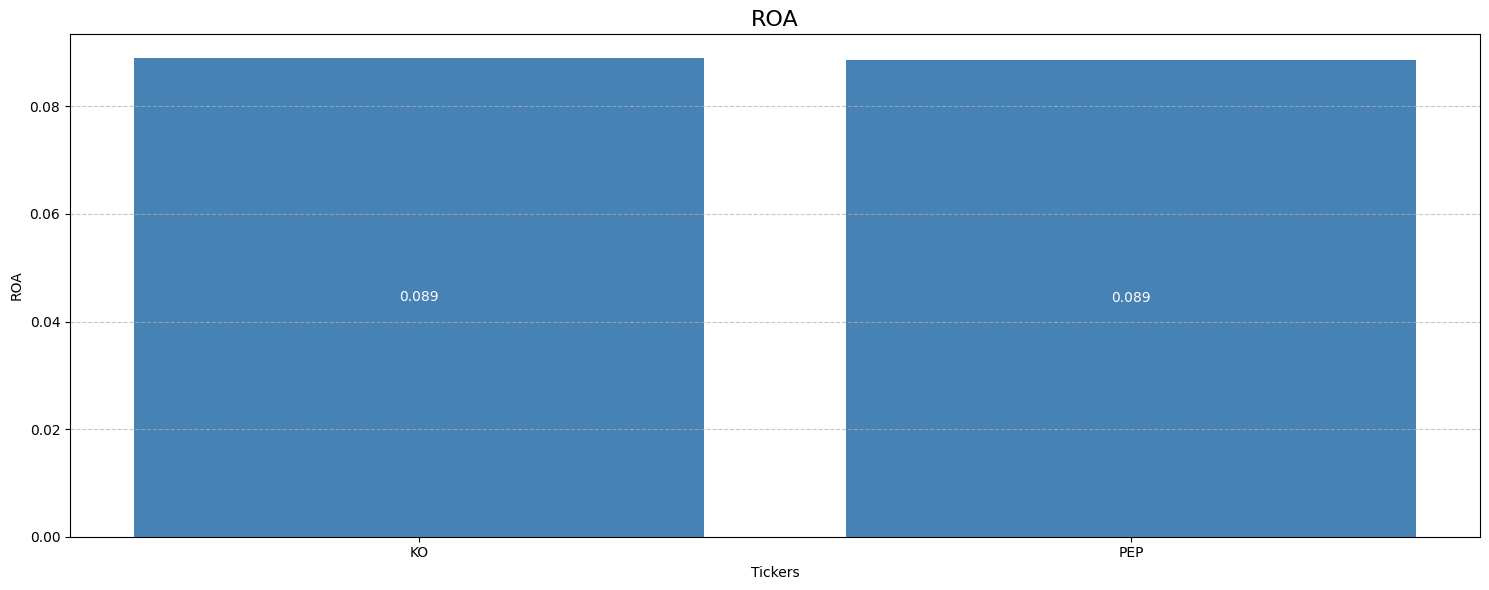

In [375]:

# Extraire les données uniques
symbols = ratios_consumer_defensive['symbol'].unique()
ROA = ratios_consumer_defensive.drop_duplicates(subset='symbol')['returnOnAssets'].values

# Créer le graphique en barres
plt.figure(figsize=(15, 6))
bars = plt.bar(symbols, ROA, color='steelblue')

# Ajouter les valeurs dans les barres
for bar, value in zip(bars, ROA):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{value:.3f}', ha='center', va='center', color='white', fontsize=10)

# Personnaliser le graphique
plt.title("ROA", fontsize=16)
plt.xlabel("Tickers")
plt.ylabel("ROA")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Le ROA des 2 tickers sont quasiment égaux. Cependant nous pouvons décomposer le ROA comme ceci : ROA=Marge Nette * Rotation des Actifs. Ce qui permet de déterminer si le ROA est élevé par une marge nette élevée ou bien par une rotation des actifs élevée.

---
Nous avons déjà calculé la marge nette et la rotation des actifs pour les 2 tickers pour le ROE


In [376]:
is_KO[['Ticker', 'Date', 'Marge Nette', 'Rotation Actifs']]

,Ticker,Date,Marge Nette,Rotation Actifs
3,KO,2021-12-31,0.252775,0.409681
2,KO,2022-12-31,0.221886,0.463590
1,KO,2023-12-31,0.234165,0.468297
0,KO,2024-12-31,0.225898,0.468040


In [377]:
is_PEP[['Ticker', 'Date', 'Marge Nette', 'Rotation Actifs']]

,Ticker,Date,Marge Nette,Rotation Actifs
3,PEP,2021-12-31,0.095855,0.860322
2,PEP,2022-12-31,0.103135,0.937139
1,PEP,2023-12-31,0.099201,0.910204
0,PEP,2024-12-31,0.104274,0.923462


Pour KO, sa marge nette est supérieur à celle de PEP. Par contre la rotation des actifs de PEP est supérieur à celle de KO. Dit autrement, pour KO son ROA provient de ses marges bénéficiaires, tandis que pour PEP, son ROA provient de sa rotation des actifs, c'est à dire un volume de ventes plus élevé que KO.

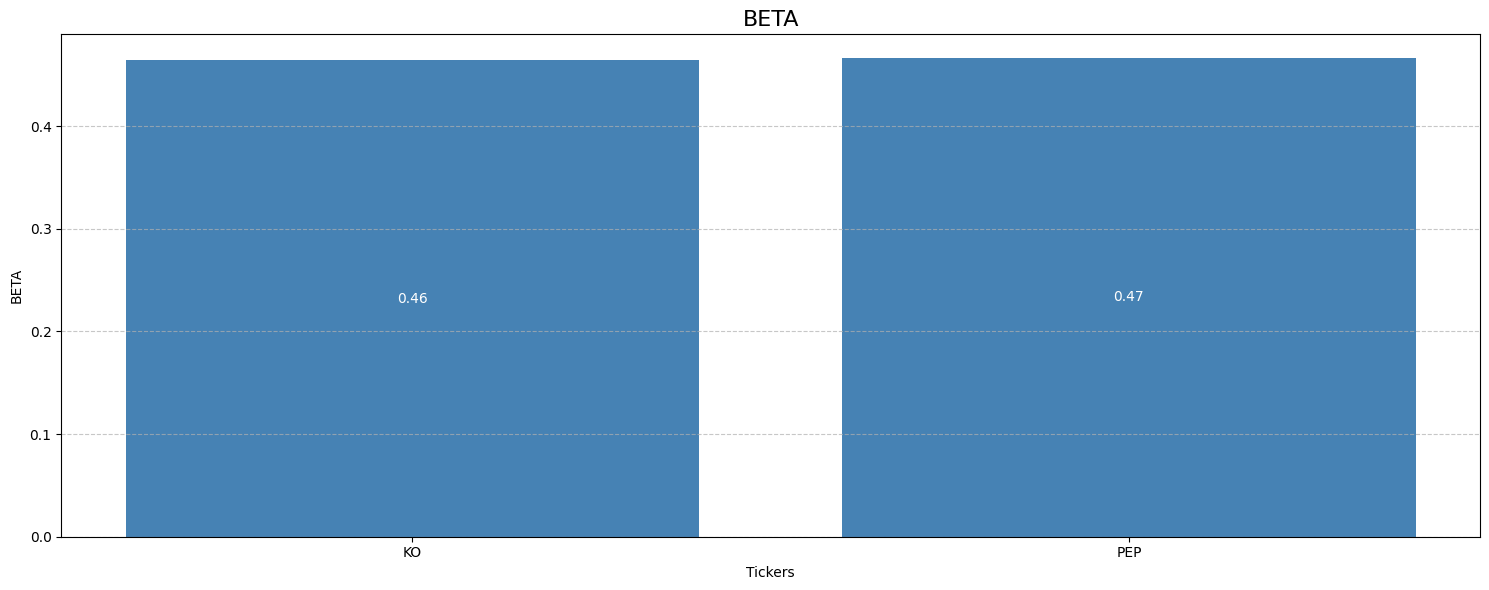

In [378]:

# Extraire les données uniques
symbols = ratios_consumer_defensive['symbol'].unique()
BETA = ratios_consumer_defensive.drop_duplicates(subset='symbol')['beta'].values

# Créer le graphique en barres
plt.figure(figsize=(15, 6))
bars = plt.bar(symbols, BETA, color='steelblue')

# Ajouter les valeurs dans les barres
for bar, value in zip(bars, BETA):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{value:.2f}', ha='center', va='center', color='white', fontsize=10)

# Personnaliser le graphique
plt.title("BETA", fontsize=16)
plt.xlabel("Tickers")
plt.ylabel("BETA")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Les deux actions ayant un Bêta < 1, leurs cours sont moins volatiles que le marché (S&P500 par exemple). Le Bêta de PEP est quasiment égal à celui de KO. Pour 1% de variation du marché (S&P500 par exemple), les deux actions KO et PEP varient d'environ 0.46% et 0.47% respectivement, à la hausse comme à la baisse. Ces actions sont donc moins risquées que la moyenne du marché, mais aussi potentiellement moins rémunératrices.

**Earnings Growth**

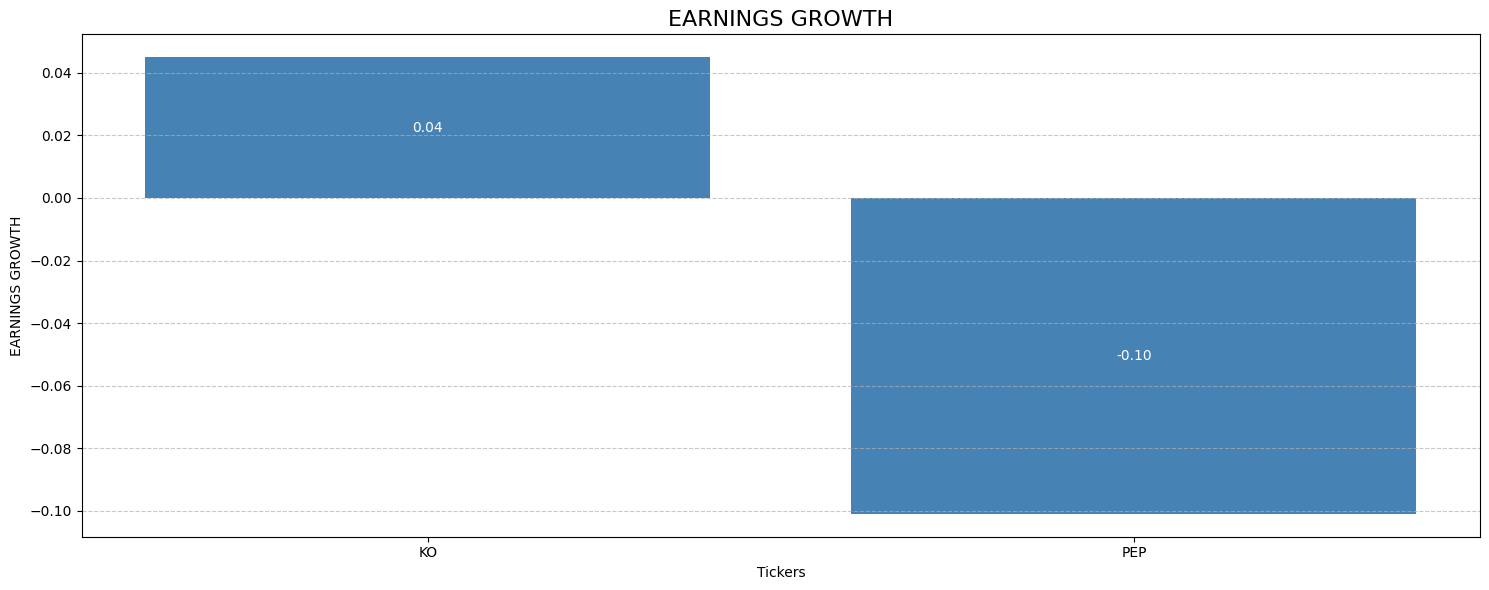

In [379]:

# Extraire les données uniques
symbols = ratios_consumer_defensive['symbol'].unique()
EARNINGS_GROWTH = ratios_consumer_defensive.drop_duplicates(subset='symbol')['earningsGrowth'].values

# Créer le graphique en barres
plt.figure(figsize=(15, 6))
bars = plt.bar(symbols, EARNINGS_GROWTH, color='steelblue')

# Ajouter les valeurs dans les barres
for bar, value in zip(bars, EARNINGS_GROWTH):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{value:.2f}', ha='center', va='center', color='white', fontsize=10)

# Personnaliser le graphique
plt.title("EARNINGS GROWTH", fontsize=16)
plt.xlabel("Tickers")
plt.ylabel("EARNINGS GROWTH")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Le earningsGrowth de PEP étant négatif, le bénéfice net à donc diminué. C'est un signal plutot négatif pour le marché et peut entrainer une baisse de confiance des investisseurs. Qui peut etre du à plusieurs facteurs comme un essouflement des ventes comme vu précédemment, une hausse des charges/dépenses etc.. Pour KO, le ratio est positif, ce qui indique au contraire une croissance des bénéfice et une confiance accrue des investisseurs. Ce ratio est nettement plus favorable à KO qu'à PEP.

**PER**

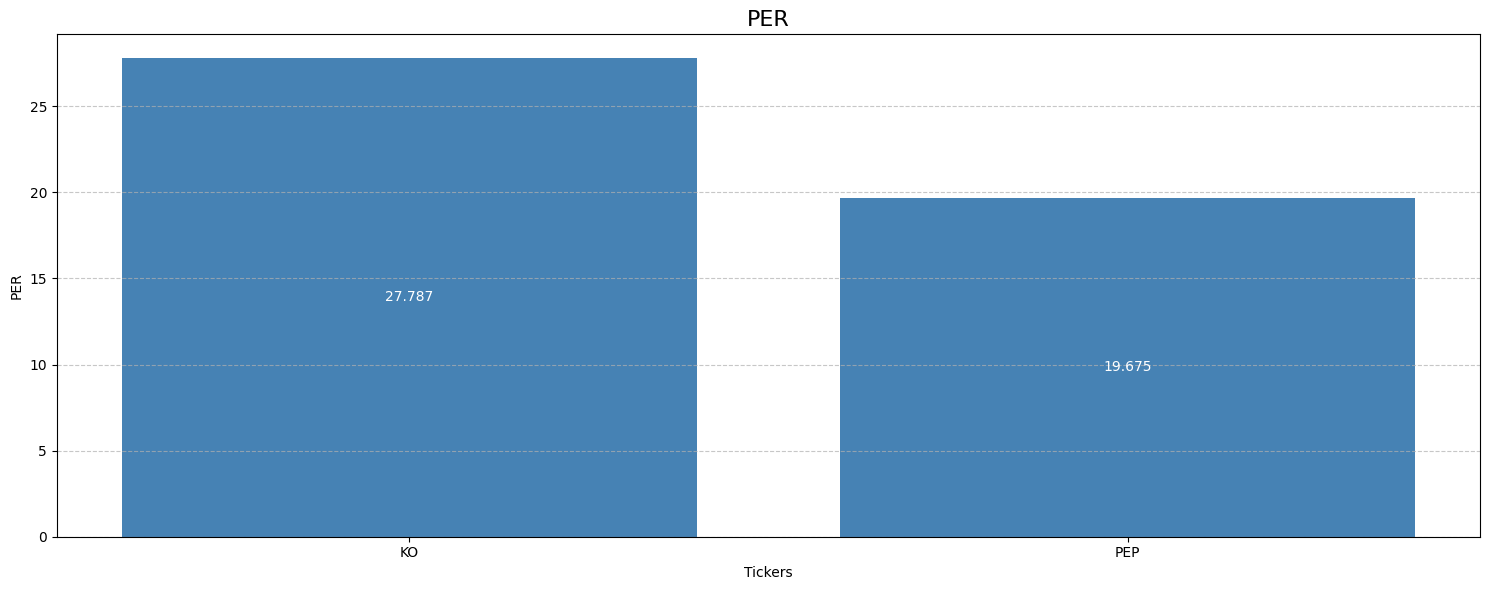

In [380]:

# Extraire les données uniques
symbols = ratios_consumer_defensive['symbol'].unique()
PER = ratios_consumer_defensive.drop_duplicates(subset='symbol')['trailingPE'].values

# Créer le graphique en barres
plt.figure(figsize=(15, 6))
bars = plt.bar(symbols, PER, color='steelblue')

# Ajouter les valeurs dans les barres
for bar, value in zip(bars, PER):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{value:.3f}', ha='center', va='center', color='white', fontsize=10)

# Personnaliser le graphique
plt.title("PER", fontsize=16)
plt.xlabel("Tickers")
plt.ylabel("PER")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Le PER de KO est supérieur de 10 points à celui de PEP. Cela peut signifier que le marché anticipe une croissance plus forte des bénéfices futurs de KO.

Autrement dit, les investisseurs semblent prêts à payer plus cher chaque dollar de bénéfice de KO, car ils jugent que l’entreprise est soit plus solide, soit plus prometteuse à long terme.

Vu l’analyse comparative réalisée entre KO et PEP (liquidité, dette, rentabilité, croissance des bénéfices), cette valorisation plus élevée semble cohérente. Toutefois, elle implique aussi une attente plus forte de performance future de la part de KO. Il faudra donc que ses bénéfices suivent cette trajectoire pour que ce PER élevé reste justifié.



**Debt/Equity**

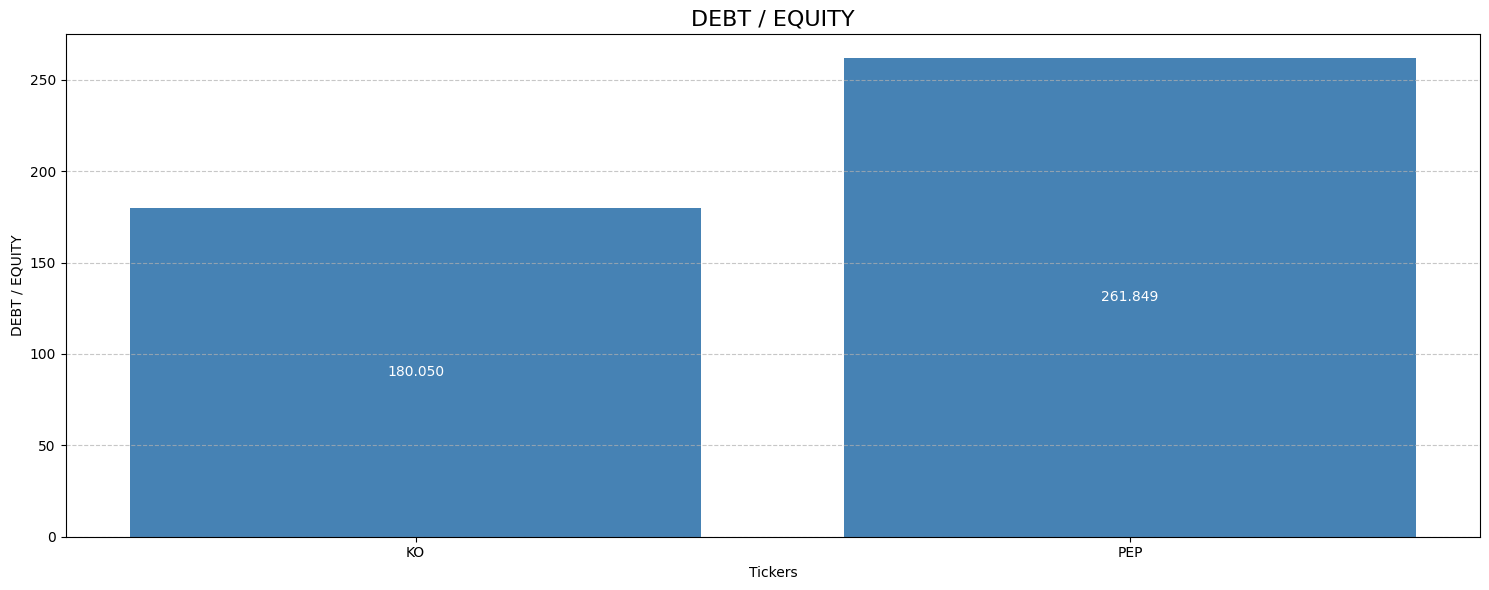

In [381]:

# Extraire les données uniques
symbols = ratios_consumer_defensive['symbol'].unique()
DEBT_TO_EQUITY = ratios_consumer_defensive.drop_duplicates(subset='symbol')['debtToEquity'].values

# Créer le graphique en barres
plt.figure(figsize=(15, 6))
bars = plt.bar(symbols, DEBT_TO_EQUITY, color='steelblue')

# Ajouter les valeurs dans les barres
for bar, value in zip(bars, DEBT_TO_EQUITY):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{value:.3f}', ha='center', va='center', color='white', fontsize=10)

# Personnaliser le graphique
plt.title("DEBT / EQUITY", fontsize=16)
plt.xlabel("Tickers")
plt.ylabel("DEBT / EQUITY")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Le debtToEquity de PEP est nettement supérieur à celui de KO. Ce n'est pas forcément un mauvais signal à priori. En effet, une entreprise qui s'endette pour financer de nouveaux actifs par exemple (Batiments, machines outils, etc..) dans le but de générer un plus grand revenu est justifiable. Cependant, PEP génére un % de variation de revenu plus faible que KO comme vu précédemment et PEP utilise un plus grand effet de levier par la dette. Ce ratio d'endettement est beaucoup plus favorable à KO qui est moins dépendante de la dette pour financer ses activités.

**FreeCashflow**

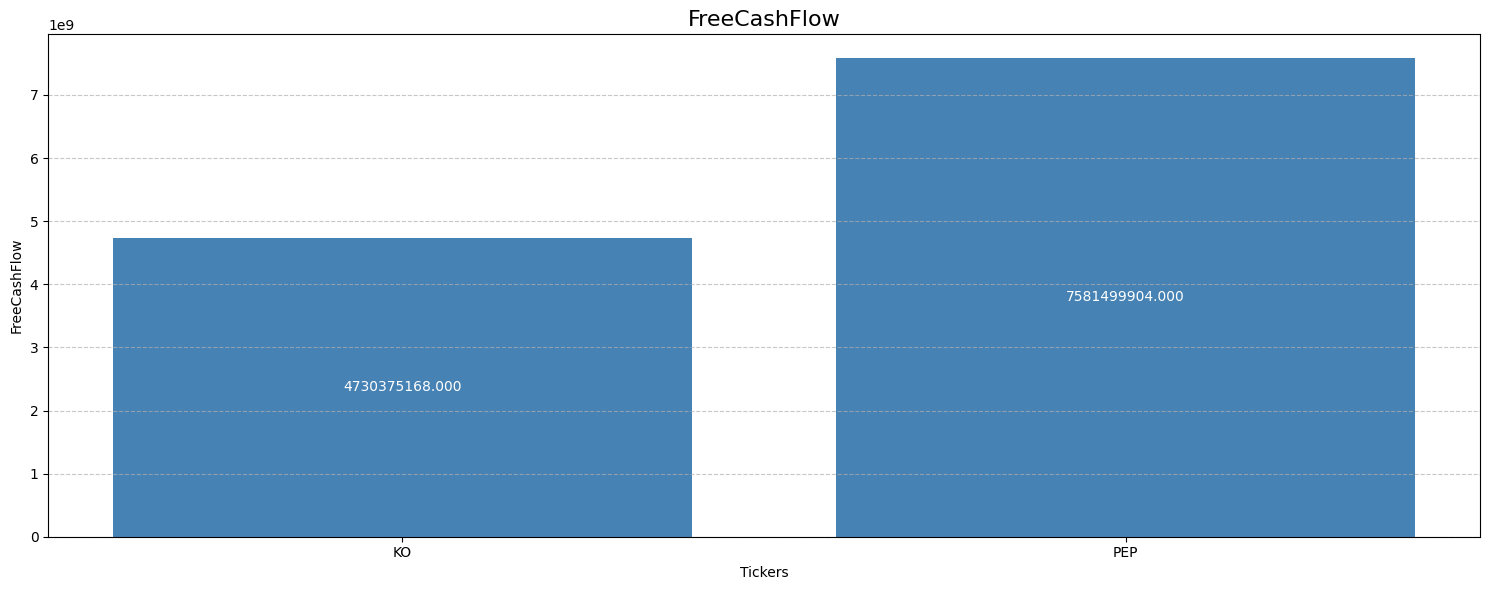

In [382]:

# Extraire les données uniques
symbols = ratios_consumer_defensive['symbol'].unique()
FREE_CASHFLOW = ratios_consumer_defensive.drop_duplicates(subset='symbol')['freeCashflow'].values

# Créer le graphique en barres
plt.figure(figsize=(15, 6))
bars = plt.bar(symbols, FREE_CASHFLOW, color='steelblue')

# Ajouter les valeurs dans les barres
for bar, value in zip(bars, FREE_CASHFLOW):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{value:.3f}', ha='center', va='center', color='white', fontsize=10)

# Personnaliser le graphique
plt.title("FreeCashFlow", fontsize=16)
plt.xlabel("Tickers")
plt.ylabel("FreeCashFlow")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Le Freecashflow de PEP est nettement supérieur à celui de KO. Cela confére plusieurs avantages cruciaux à PEP comme plus de liquidité pour :

*   L'investissement
*   Remboursement de dettes (partielle ou plus rarement totale)
*   Redistribution aux actionnaires (sous forme de rajout de dividendes)
*   L'attractivité de l'action aux yeux des investisseurs

---


Cet indicateur est nettement plus favorable à PEP qu'à KO, mais comparer 2 FreeCashFlow seuls, sans contexte n'est pas trés pertinent. Si par exemple une entreprise fait 1 milliard (USD) de chiffre d'affaire avec un FreeCashFlow de 100 millions (USD) et une deuxième entreprise fait 800 millions (USD) de chiffre d'affaire avec 90 millions (USD) de FreeCashFlow. La deuxième entreprise est plus performante au niveau de son FreeCashflow, meme si elle possède moins de FreeCashFlow que la première entreprise. En effet 90/800 c'est supérieur à 100/1000.

---

Il est donc nécessaire de ramener le FreeCashFlow de KO et PEP à un autre indicateur/mesure pour pouvoir comparer véritablement les performances des 2 entreprises.

**FreeCashflow / CA**

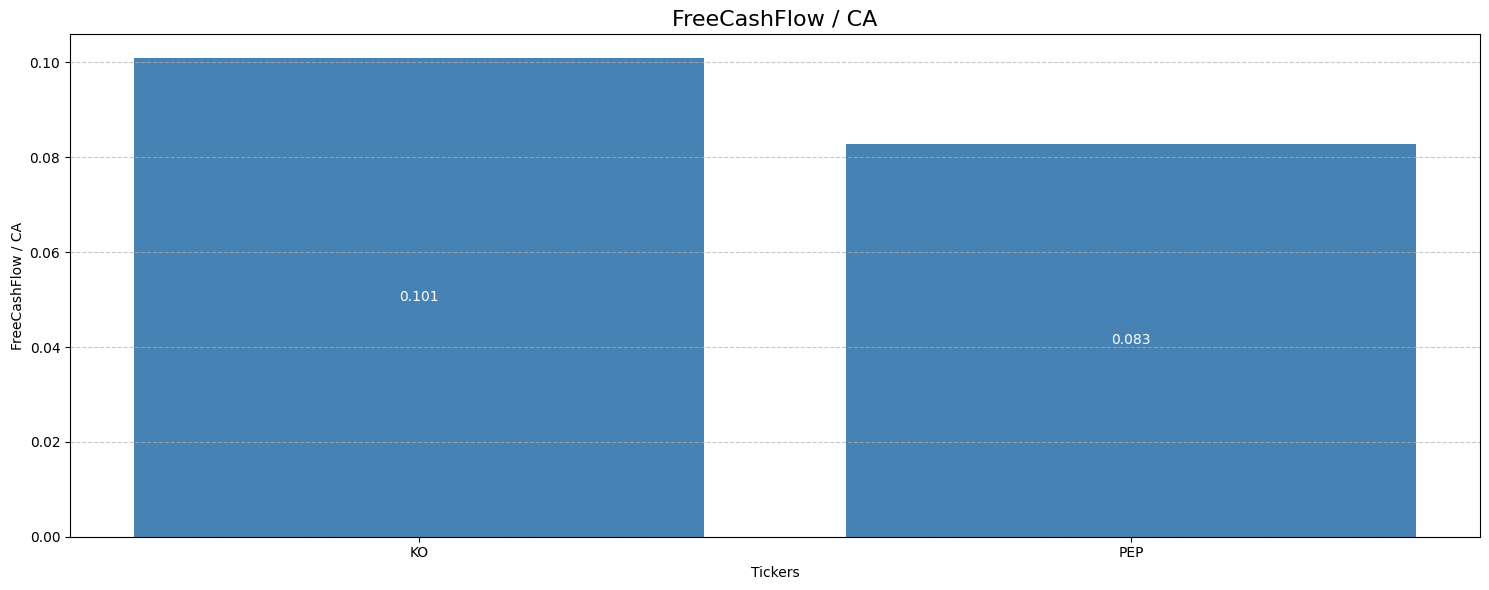

In [383]:

# Extraire les données uniques
symbols = ratios_consumer_defensive['symbol'].unique()
FREE_CASHFLOW = ratios_consumer_defensive.drop_duplicates(subset='symbol')['freeCashflow'].values
TOTAL_REVENUE = ratios_consumer_defensive['totalRevenue'].unique()

# Créer le graphique en barres
plt.figure(figsize=(15, 6))
bars = plt.bar(symbols, FREE_CASHFLOW / TOTAL_REVENUE, color='steelblue')

# Ajouter les valeurs dans les barres
for bar, value in zip(bars, FREE_CASHFLOW / TOTAL_REVENUE):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{value:.3f}', ha='center', va='center', color='white', fontsize=10)

# Personnaliser le graphique
plt.title("FreeCashFlow / CA", fontsize=16)
plt.xlabel("Tickers")
plt.ylabel("FreeCashFlow / CA")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Le Freecashflow / chiffre d'affaire de KO est nettement supérieur à celui de PEP. En d'autres termes, le FreeCashflow de KO est égal à 10.1% de son chiffre d'affaire. Ce qui est nettement plus favorable que PEP avec seulement 8.3%

Cet indicateur est nettement plus favorable à KO qu'à PEP




**Quick Ratio**

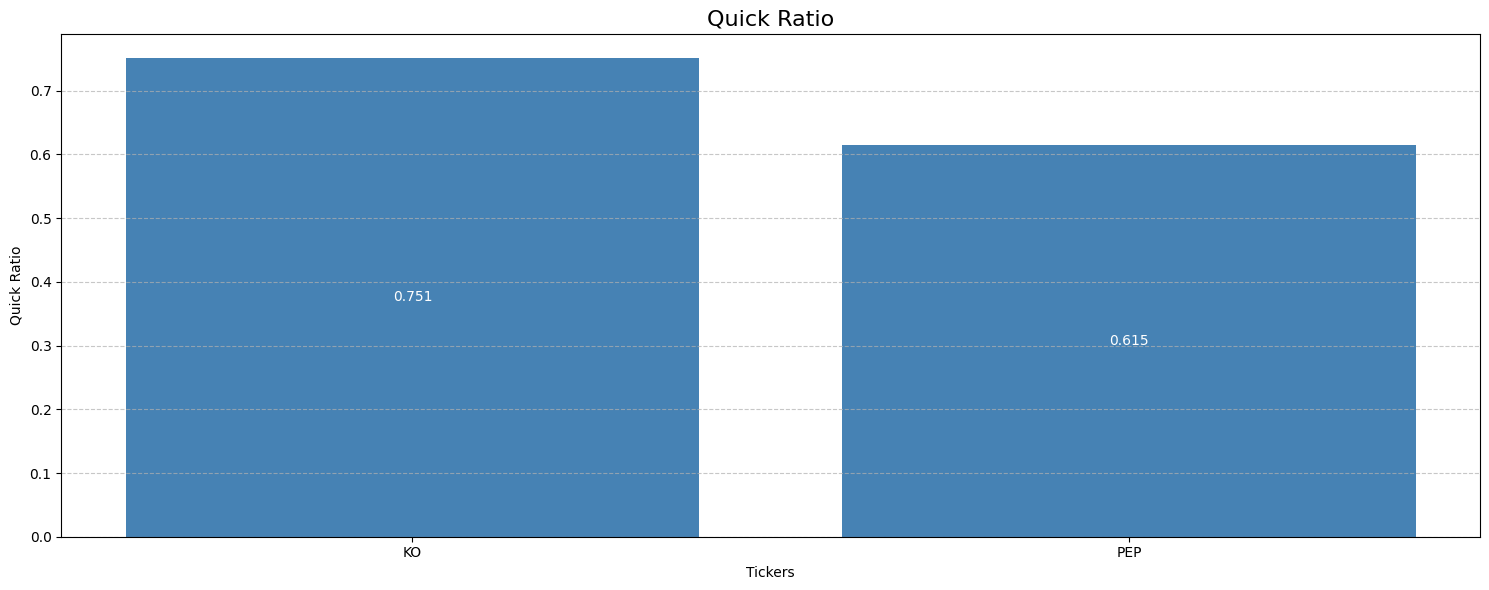

In [384]:

# Extraire les données uniques
symbols = ratios_consumer_defensive['symbol'].unique()
QUICK_RATIO = ratios_consumer_defensive.drop_duplicates(subset='symbol')['quickRatio'].values

# Créer le graphique en barres
plt.figure(figsize=(15, 6))
bars = plt.bar(symbols, QUICK_RATIO, color='steelblue')

# Ajouter les valeurs dans les barres
for bar, value in zip(bars, QUICK_RATIO):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{value:.3f}', ha='center', va='center', color='white', fontsize=10)

# Personnaliser le graphique
plt.title("Quick Ratio", fontsize=16)
plt.xlabel("Tickers")
plt.ylabel("Quick Ratio")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Le Quick Ratio mesure la capacité d’une entreprise à rembourser ses dettes à court terme avec ses actifs les plus liquides, c’est-à-dire hors stocks.

KO ayant un quick ratio supérieur à PEP, KO a plus de liquidités (très court terme) par rapport à ses dettes à court terme que PEP.

KO est donc potentiellement mieux positionnée pour faire face à ses obligations immédiates.
Ce ratio valorise plus KO que PEP.


**Profit Margins**

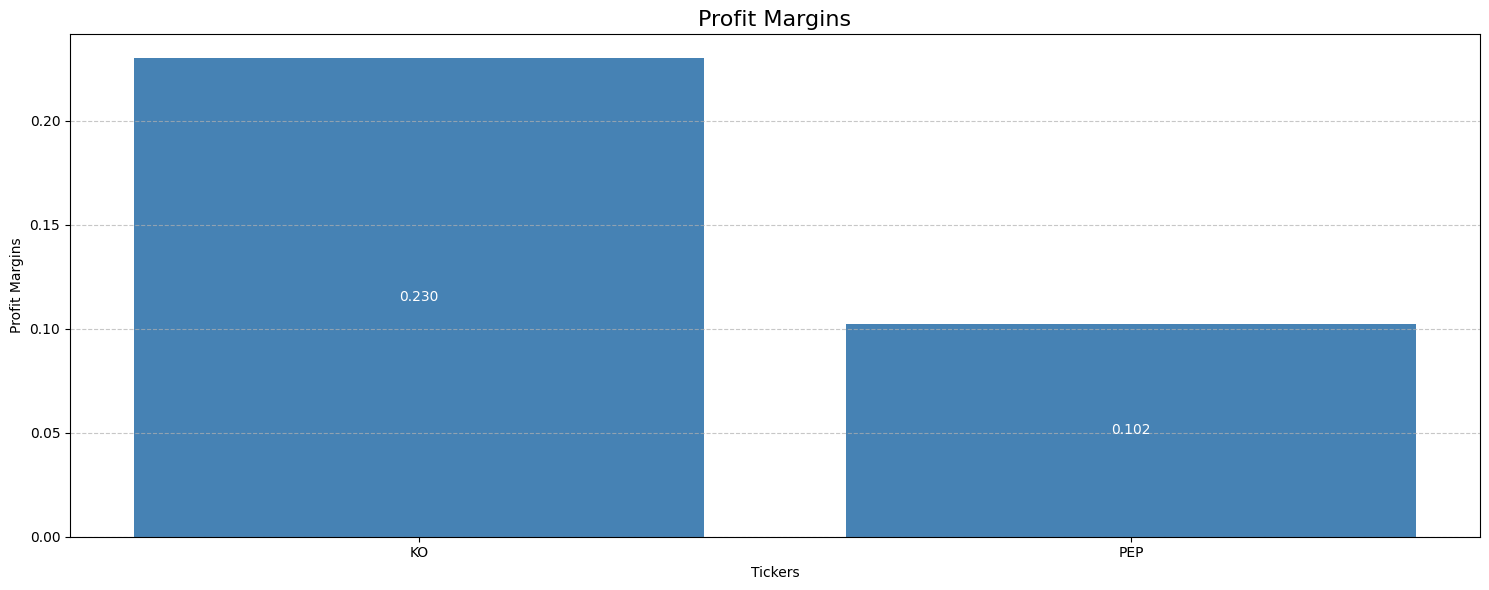

In [385]:

# Extraire les données uniques
symbols = ratios_consumer_defensive['symbol'].unique()
PROFIT_MARGINS = ratios_consumer_defensive.drop_duplicates(subset='symbol')['profitMargins'].values

# Créer le graphique en barres
plt.figure(figsize=(15, 6))
bars = plt.bar(symbols, PROFIT_MARGINS, color='steelblue')

# Ajouter les valeurs dans les barres
for bar, value in zip(bars, PROFIT_MARGINS):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{value:.3f}', ha='center', va='center', color='white', fontsize=10)

# Personnaliser le graphique
plt.title("Profit Margins", fontsize=16)
plt.xlabel("Tickers")
plt.ylabel("Profit Margins")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Le ratio profit margins mesure la rentabilité de l'entreprise après avoir déduit toutes les dépenses, taxes, interets etc.. KO a un profitMargins 2 fois plus élevé que PEP. Au vu des résultats obtenus plus haut dans l'analyse, comme le Net Income raporté au chiffre d'affaire qui est plus favorable pour KO, c'est logique que le ratio profitMargins valorise plus KO que PEP.

**Opearting Margins**

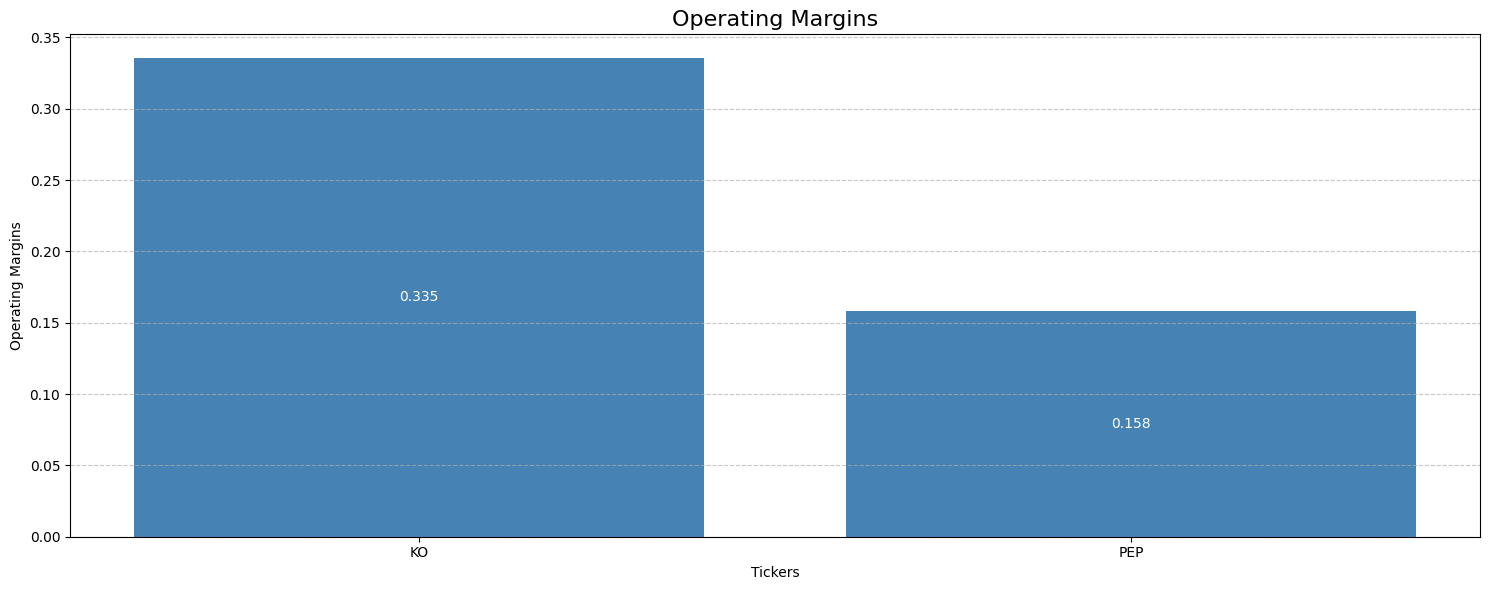

In [386]:

# Extraire les données uniques
symbols = ratios_consumer_defensive['symbol'].unique()
OPERATING_MARGINS = ratios_consumer_defensive.drop_duplicates(subset='symbol')['operatingMargins'].values

# Créer le graphique en barres
plt.figure(figsize=(15, 6))
bars = plt.bar(symbols, OPERATING_MARGINS, color='steelblue')

# Ajouter les valeurs dans les barres
for bar, value in zip(bars, OPERATING_MARGINS):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{value:.3f}', ha='center', va='center', color='white', fontsize=10)

# Personnaliser le graphique
plt.title("Operating Margins", fontsize=16)
plt.xlabel("Tickers")
plt.ylabel("Operating Margins")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


L'operatingMargins de KO est presque 2 fois plus élevé que pour PEP. Comme nous l'avons vu précédemment, l'EBIT / Chiffre d'affaire était à l'avantage de KO

**Ebitda Margins**

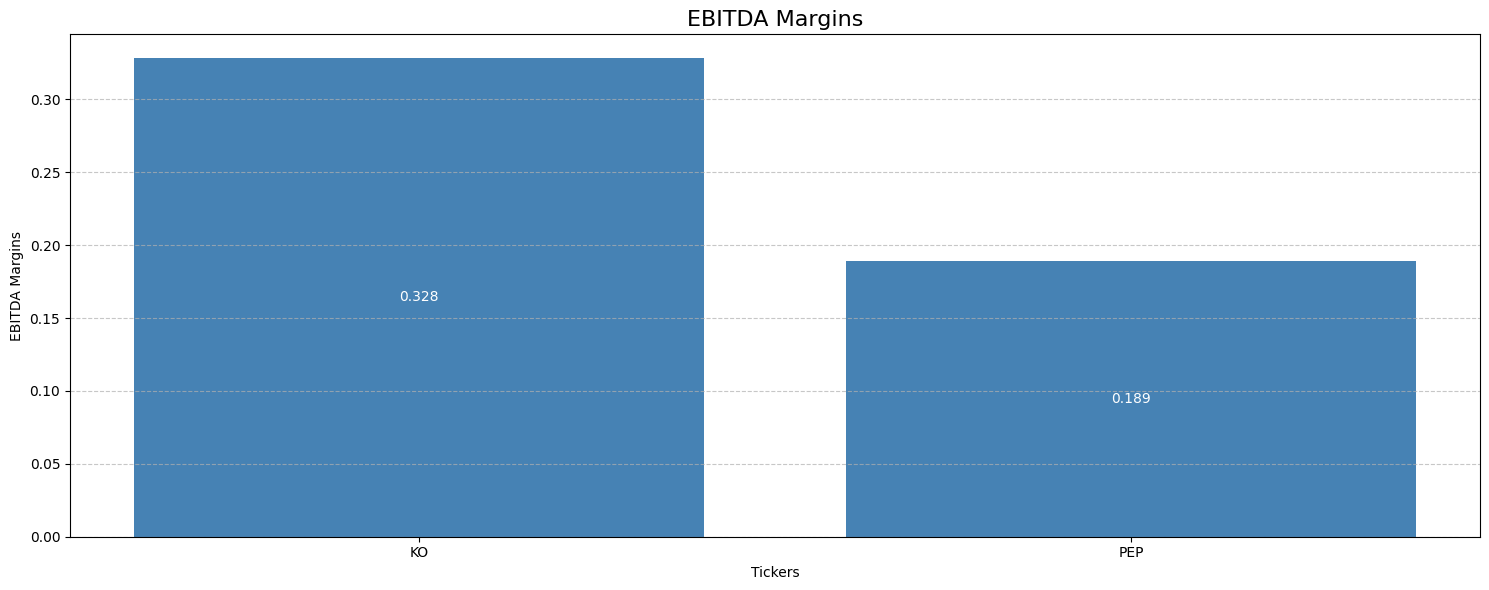

In [387]:

# Extraire les données uniques
symbols = ratios_consumer_defensive['symbol'].unique()
EBITDA_MARGINS = ratios_consumer_defensive.drop_duplicates(subset='symbol')['ebitdaMargins'].values

# Créer le graphique en barres
plt.figure(figsize=(15, 6))
bars = plt.bar(symbols, EBITDA_MARGINS, color='steelblue')

# Ajouter les valeurs dans les barres
for bar, value in zip(bars, EBITDA_MARGINS):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{value:.3f}', ha='center', va='center', color='white', fontsize=10)

# Personnaliser le graphique
plt.title("EBITDA Margins", fontsize=16)
plt.xlabel("Tickers")
plt.ylabel("EBITDA Margins")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Etant donné que pour PEP le rapport couts de ventes / chiffre d'affaire est supérieur à celui de KO, c'est cohérent que l'EBITDA Margins de KO soit supérieur. De plus, étant donné que le cout des ventes de KO soit plus faible que celui de PEP, cela donne une plus grande marge de manoeuvre pour investir, résister aux chocs ou pour verser des dividendes.

**Payout Ratio**

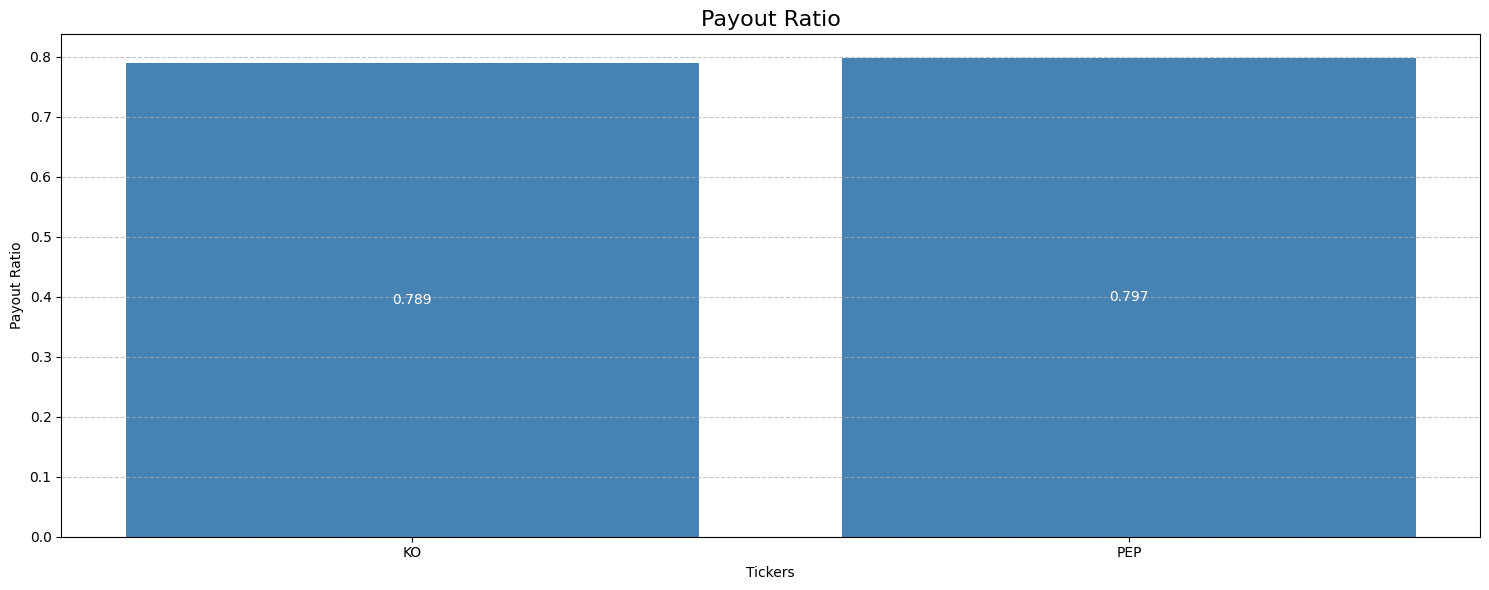

In [388]:

# Extraire les données uniques
symbols = ratios_consumer_defensive['symbol'].unique()
PAYOUT_RATIO = ratios_consumer_defensive.drop_duplicates(subset='symbol')['payoutRatio'].values

# Créer le graphique en barres
plt.figure(figsize=(15, 6))
bars = plt.bar(symbols, PAYOUT_RATIO, color='steelblue')

# Ajouter les valeurs dans les barres
for bar, value in zip(bars, PAYOUT_RATIO):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
             f'{value:.3f}', ha='center', va='center', color='white', fontsize=10)

# Personnaliser le graphique
plt.title("Payout Ratio", fontsize=16)
plt.xlabel("Tickers")
plt.ylabel("Payout Ratio")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Les 2 entreprises ont un taux de versement des bénéfices élevé. Prés de 80% des bénéfices sont reversés aux actionnaires sous forme de dividendes. Donc moins de cash pour réinvestir. Les 2 entreprises ont quasiment la même politique de versement.

**Conclusion**

Au vu de cette analyse comparative entre KO et PEP, je choisi KO car elle possède une meilleure rentabilité, des couts moins importants, un effet de levier plus limité, meilleur FreeCashFlow / Chiffre d'affaire que PEP.

In [389]:
ratios_consumer_defensive[['symbol', 'recommendationKey']].drop_duplicates()

,symbol,recommendationKey
0,KO,buy
1,PEP,hold


Pour conclure cette analyse, j'ai demandé à yahoo finance de me donner ses recommandations d'achat pour KO et PEP et c'est KO qui l'emporte, avec comme recommandation buy donc achat. Pour PEP, la recommandation est de maintenir ses actions déjà présentes en portefeuille (hold).